#### Imports

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

#  **Climate Change versus Agricultural Production in California**
## By: Ian, Tracy, Emma, and Paulina

### Abstract:
The purpose of this project is to determine the effects of climate change on agricultural production in California. We will analyze data from the past four decades on crop production, precipitation, and temperature. Our results show that there do exist correlations between precipitation, temperature, and crop production, and that continued climate change will likely result in increased farming difficulty.

## Introduction and Background

Did you know that California is the leading agricultural state in the US? In fact, it produces over 400 different types of crops, with an exception of 14 that are found only in California. However, how are they able to manage this, being one of the largest states in the US? Given the declining rate of precipitation leading to droughts and water shortages, our group is looking to explore how crop production and year correlates to the amount of precipitation recorded. In specific, we are looking to focus on how the production of tomatoes in both Fresno county and the state of CA have been impacted by precipitation and temperature levels. Individuals should be interested in this analysis because our rigorous data can reveal whether California is effectively using alternative methods to support its agriculture in response to unpredictable weather conditions.

## Data Used

The two primary datasets for this analysis are temperature and precipitation data from NOAA's Climate Division database, and a compiled set of the California County Agricultural Commissioners yearly crop reports.

**NOAA ClimDiv Data**

NOAA's Climate Division data contains data on precipitation and temperature values on a monthly basis from 1895 to the present. Data is presented at various geographic levels, though only the statewide and countywide data is relevant to this analysis. A description of the dataset can be found [here](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00005). Data was downloaded from the download [site](https://www.ncei.noaa.gov/pub/data/cirs/climdiv/), and compiled using the [CleaningClimDiv.ipbyn](./CleaningClimDiv.ipynb) script.

**California Agricultural Commissioners Reports**

The California Agricultural Commissioners Crop Reports data is published in table format by the USDA under its National Agricultural Statistics Service. It contains various measures of agricultural output, including yield, production, and total dollar value of crops produced. The data is found [here](https://www.nass.usda.gov/Statistics_by_State/California/Publications/AgComm/index.php). Data was partially scraped, though the webpage of download links was downloaded manually. Data was then cleaned and concatenated largely programmatically. The download and consolidation script is [CleaningAgricultureData.ipynb](./CleaningAgricultureData.ipynb).

#### Precipitation

In [10]:
DF_pre = pd.read_csv('ClimDivData/climdiv_pcpn_cty_clean_trim.csv')
show(DF_pre)

In this data set above, it shows the precipitation between different counties and years in the state if California for different months.

In [12]:
show(DF_pre.describe())

This is describing all the data from the precipitation dataset. As we can see, the years go from 1980 to 2024. The highest precipitation level in California was in December at 36.18.

In [14]:
DF_pre.columns

Index(['DataType', 'State', 'County', 'Year', 'Jan', 'Feb', 'Mar', 'Apr',
       'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

Let's look at data coming from Fresno, since that is the biggest agricultural county in California.

In [16]:
Fresno = mask = DF_pre['County'] == 'Fresno'
Fresno = DF_pre[mask]
show(Fresno)

In [17]:
show(Fresno.describe())

During the years 1980 to 2024, the max percipitation level was 12.17 in January in Fresno, CA.

Let's look at Imperial County precipitation data since Imperial County is more south of Fresno, so we can look to see if there is a difference.

In [20]:
Imperial = mask = DF_pre['County'] == 'Imperial'
Imperial = DF_pre[mask]
show(Imperial)

In [21]:
show(Imperial.describe())

In this dataset, we can see that there is a big difference from Fresno to Imperial in max precipitation levels. In the years 1980 to 2024, the highest precipitation level in Imperial county was in January at only 3.05. Where as Fresno's max in January was 12.17.

#### California Agricultural Statistics

In [24]:
agdata_df = pd.read_csv('CaUsda/CaUsdaFull.csv')

In [25]:
agdata_df.columns

Index(['Year', 'Commodity Code', 'Crop Name', 'County Code', 'County',
       'Harvested Acres', 'Yield', 'Production', 'Price Per Unit', 'Unit',
       'Value'],
      dtype='object')

Each field in the table represents a statistic on the output of a crop (Crop Name) for a given year (Year) and county (County). Measures of output include the number of acres harvested (Harvested Acres), the yield of the crop in tons per acre (Yield), the production of the crop in tons (Production), the dollar price per unit of the crop (Price Per Unit), the unit of measure (Unit--this is Tons for every crop relevant to this analysis, and the total value of the full crop production in dollars (Value). 

In [27]:
agdata_df['Crop Name'].unique()

array(['ALMONDS ALL', 'BERRIES STRAWBERRIES FRESH MARKET',
       'CARROTS FRESH MARKET', 'GRAPES RAISIN', 'GRAPES WINE',
       'HAY ALFALFA', 'LETTUCE HEAD', 'LETTUCE ROMAINE', 'ORANGES NAVEL',
       'PISTACHIOS', 'RICE MILLING', 'TOMATOES PROCESSING'], dtype=object)

Crop types have been winnowed down to a subset of the highest-valued (with some exceptions) crops based on production in 2023. Most of the analysis will be centered around TOMATOES PROCESSING (that is, tomatoes intended for processing rather than for being sold fresh).

In [29]:
counties = agdata_df['County'].unique()
counties.sort()
counties

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'El Dorado', 'Fresno', 'Glenn', 'Humboldt',
       'Imperial', 'Inyo', 'Kern', 'Kings', 'Lake', 'Lassen',
       'Los Angeles', 'Madera', 'Marin', 'Mariposa', 'Mendocino',
       'Merced', 'Modoc', 'Mono', 'Monterey', 'Napa', 'Nevada', 'Orange',
       'Placer', 'Plumas', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Joaquin', 'San Luis Obispo',
       'San Mateo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz',
       'Shasta', 'Sierra', 'Siskiyou', 'Solano', 'Sonoma', 'Stanislaus',
       'State Total', 'Sum of Others', 'Sutter', 'Tehama', 'Trinity',
       'Tulare', 'Ventura', 'Yolo', 'Yuba'], dtype=object)

The dataset includes two special counties, State Total and Sum of Others. Their names are self-explanatory, and the State Total 'county' allows easy comparison to statewide Clim Div data.

In [31]:
print(f'Range: {agdata_df['Year'].min()} to {agdata_df['Year'].max()}')

Range: 1980 to 2020


The data goes as far back as 1980 (though not all measures of output are consistently available for older years). The data also does not include the most recent 3 years of agricultural production.

In [33]:
show(agdata_df.groupby(by='Crop Name')['Production'].describe())

In the describe table above you may note that TOMATOES PROCESSING has one of the highest counts of data points and also the highest mean production. It was for this abundance of data that TOMATOES PROCESSING was chosen for much of the further analysis later.

In [35]:
del agdata_df

## Exploratory Data Analysis

### Climate Change
Can we use the NOAA ClimDiv data to see climate change trends in California? Since the motivation of our study is to determine whether climate change could be affecting California crop production, we should determine whether we can see climate change in our data in the first place.

The first step is of course to load in the data.

In [39]:
#table paths
tminstpath = 'ClimDivData/climdiv_tmin_st_clean.csv'
tmaxstpath = 'ClimDivData/climdiv_tmax_st_clean.csv'
tavgstpath = 'ClimDivData/climdiv_tavg_st_clean.csv'
pcpnstpath = 'ClimDivData/climdiv_pcpn_st_clean.csv'

#read tables
tmin_st_df = pd.read_csv(tminstpath)
tmax_st_df = pd.read_csv(tmaxstpath)
tavg_st_df = pd.read_csv(tavgstpath)
pcpn_st_df = pd.read_csv(pcpnstpath)

We only care about California in our analysis, and data for 2024 is incomplete due to the year not being over. We therefore trim the data as such.

In [41]:
#trim to CA, but also remove 2024 because not all data is there yet
def trim_to_ca(st_df):
    return st_df[(st_df['StateId']==4)&(st_df['Year']<2024)]

tmin_st_df = trim_to_ca(tmin_st_df)
tmax_st_df = trim_to_ca(tmax_st_df)
tavg_st_df = trim_to_ca(tavg_st_df)
pcpn_st_df = trim_to_ca(pcpn_st_df)

Since the original data comes in a monthly format, it is necessary to create full-year amalgamations of data manually.

In [43]:
#make full-year amalgamations of data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

pcpn_st_df['Yearly Precipitation'] = pcpn_st_df[months].sum(axis=1)
tavg_st_df['Yearly Average Temperature'] = tavg_st_df[months].sum(axis=1)/12
tmax_st_df['Yearly Max Temperature'] = tmax_st_df[months].max(axis=1)
tmin_st_df['Yearly Min Temperature'] = tmin_st_df[months].min(axis=1)

We define a quick graphing function to make things easier.

In [45]:
def make_wt_graph(weather_df, weather_col, unit):
    """Weather-time graph. Assumes statewide tables already masked to California."""
    fig = px.scatter(
        weather_df,
        x='Year',
        y=weather_col,
        trendline='ols',
    )

    fig.update_layout(
        title_text=weather_col,
        title_x=0.5,
        xaxis_title=f'{weather_col} ({unit})'
    )

    fig.show()

Run the function on each data table.

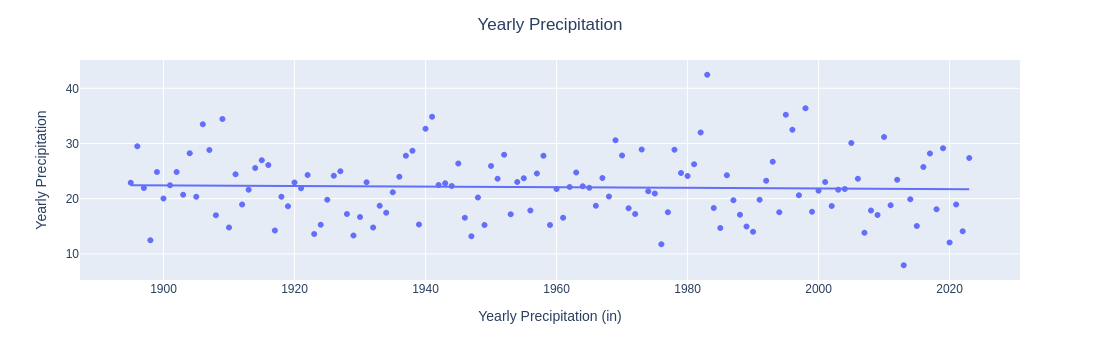

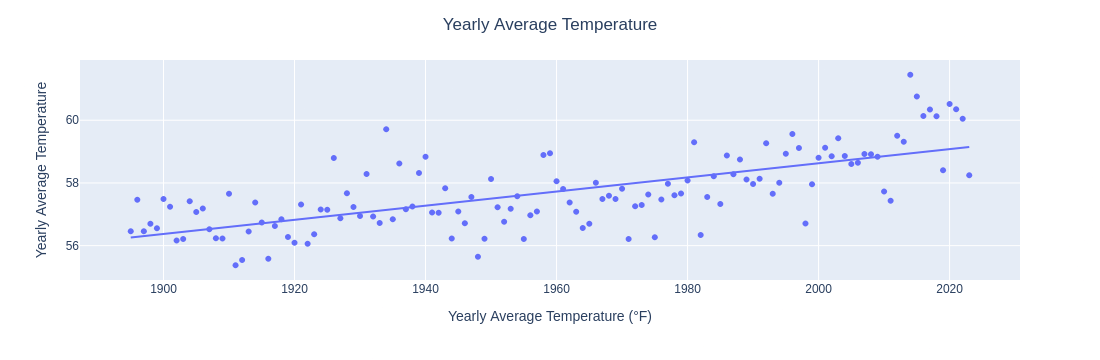

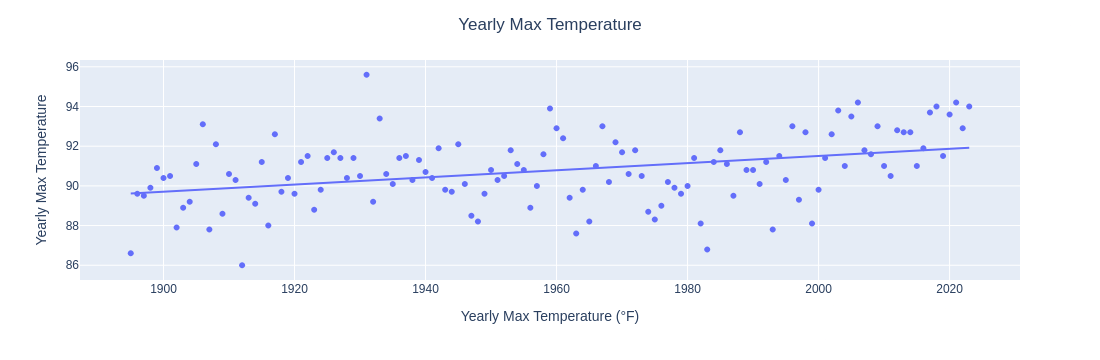

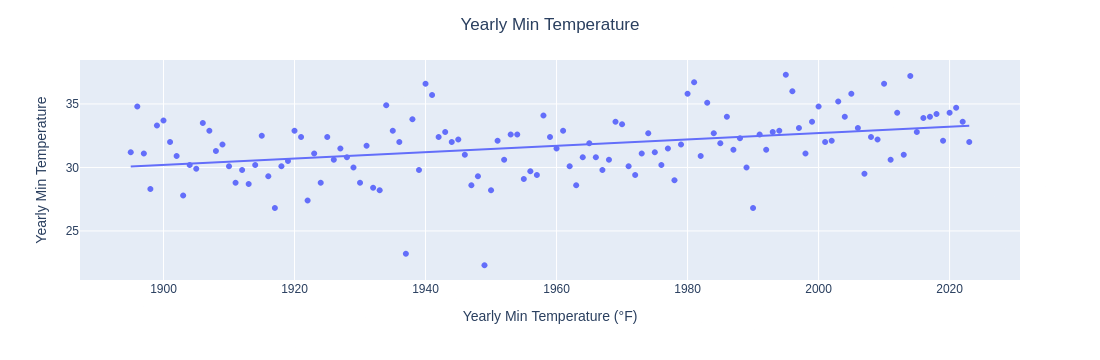

In [47]:
make_wt_graph(pcpn_st_df, 'Yearly Precipitation', 'in')
make_wt_graph(tavg_st_df, 'Yearly Average Temperature', '°F')
make_wt_graph(tmax_st_df, 'Yearly Max Temperature', '°F')
make_wt_graph(tmin_st_df, 'Yearly Min Temperature', '°F')

It is clear from the graphs that each average, minimum, and maximum yearly temperature have increased over time since 1895. If the plotly trendlines are to be believed, the increase is 2-3 degrees Fahrenheit for each measurement. The trend in yearly precipitation is less striking, but the trendline does lead us to believe that there has been a drop of about 0.5 inches in the last century.

Both trends seem likely to have an impact on crop production. Crops that cannot handle high temperatures will likely see diminished returns, whereas crops that may prefer heat may see increased production. As for precipitation, decreasing water supplies will likely limit the cultivation of crops that require healthy amounts of water.

We will also make a graph for difference in minimum and maximum temperature (aka yearly temperature range) just to see what happens.

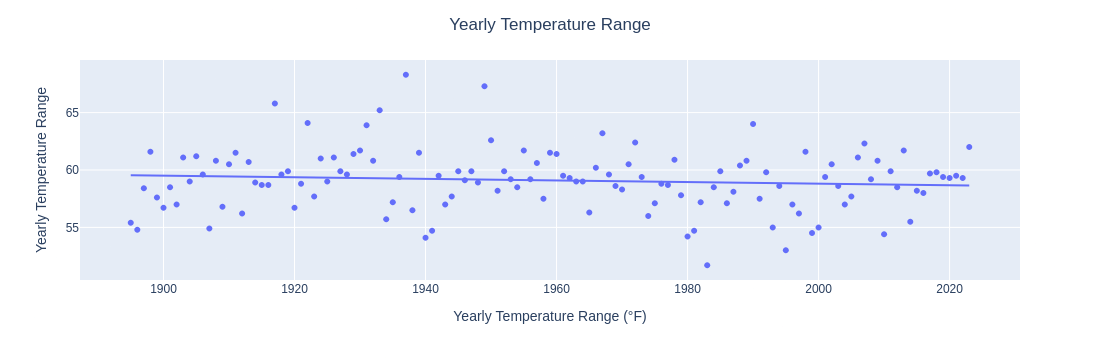

In [50]:
tdiff_st_df = pd.merge(
    tmin_st_df[['Year', 'Yearly Min Temperature']],
    tmax_st_df[['Year', 'Yearly Max Temperature']],
    how='inner', on='Year'
)

tdiff_st_df['Yearly Temperature Range'] = tdiff_st_df['Yearly Max Temperature'] - tdiff_st_df['Yearly Min Temperature']

make_wt_graph(tdiff_st_df, 'Yearly Temperature Range', '°F')

The trendline indicates there has been about a 1 degree Fahrenheit decrease in temperature range from a century ago. This indicates that not only is temperature increasing, but the minimum yearly temperature is increasing faster than the maximum yearly temperature. Crops that require a range of temperatures (e.g. oranges, which require cold to ripen) may be adversely affected.

### Crop Growth Over Time
How can we compare crop production over time?


In order to answer these questions, multiple graphs were made. First, we all decided on specific counties and crops that we wanted to observe over time. In this case, the crops that we chose were almonds, strawberries, carrots, grapes, hay, lettuce, oranges, pistachios, rice and tomatoes. As for the counties, we chose to observe Alameda, Amador, Butte, Fresno, Calaveras, Colusa, and Contra Costa. After filtering out the data, graphs were made to track crop production rate from 1980 to 2020. This question helped to lead our group into a deeper analysis, because it allows for us to see potential confounding variables which could have caused a rapid increase or decrease in crop growth.

Below is a csv file that Ian cleaned from a previous file found through USDA. Overall, he combined data sets ranging from the years 1980-2022. In addition, he was able to minimize the amount of crops displayed to only the ones that were relevant to our final project.

In [55]:
file_location = 'CaUsda/CaUsdaFull.csv'
Clean_Data = pd.read_csv(file_location)
show(Clean_Data)

Next, we want to create a new table using the original data set table. Here, we are going to limit the columns displayed only to show the ones that are relevant to our research.

In [57]:
my_columns = ['Year', 'Crop Name', 'County', 'Production']
Clean_Data = Clean_Data[my_columns]
show(Clean_Data)

The data under 'Crop Name' is looking a bit messy is disorganized givven that some crops are the same, but different variants of each other. Due to this, the code ".rename" will be used to only make the first letter of each crop capitalized rather than the entire word being in capital letters. In addition, the variants were generalized into only one crop in order to produce more data that could be used. For example, there is both "lettuce head" and "lettuce romaine", but I thought it would be easier to name them both as "Lettuce" in order to maximize my data.

In [59]:
Clean_Data['Crop Name'] = Clean_Data['Crop Name'].replace ({ 'ALMONDS ALL' : 'Almonds', 'BERRIES STRAWBERRIES FRESH MARKET' :
                                                           'Strawberries', 'CARROTS FRESH MARKET' : 'Carrots', 'GRAPES RAISIN'
                                                          : 'Grapes', 'GRAPES WINE' : 'Grapes', 'HAY ALFALFA' : 'Hay', 'LETTUCE HEAD'
                                                          : 'Lettuce', 'LETTUCE ROMAINE' : 'Lettuce', 'ORANGES NAVEL' : 'Oranges',
                                                          'PISTACHIOS' : 'Pistachios', 'RICE MILLING' : 'Rice','TOMATOES PROCESSING'
                                                            : 'Tomatoes' })

show(Clean_Data)

There was some difficulty trying to figure out how to make a line graph with multiple lines. Due to this, additional research was done in order to figure how to do this on google. One source that was used is [this link.](https://saturncloud.io/blog/how-to-plot-multiple-lines-with-pandas-dataframe/) Using this as a source also allowed us to challenge ourselves to use what we learned during this course while also experimenting and incorporating new techniques. Another source this was used originated from [stackflow](https://stackoverflow.com/questions/29233283/plotting-multiple-lines-in-different-colors-with-pandas-dataframe), which introduced out group to different styles and themes so we could make our line graph look more aesthetically pleasing.

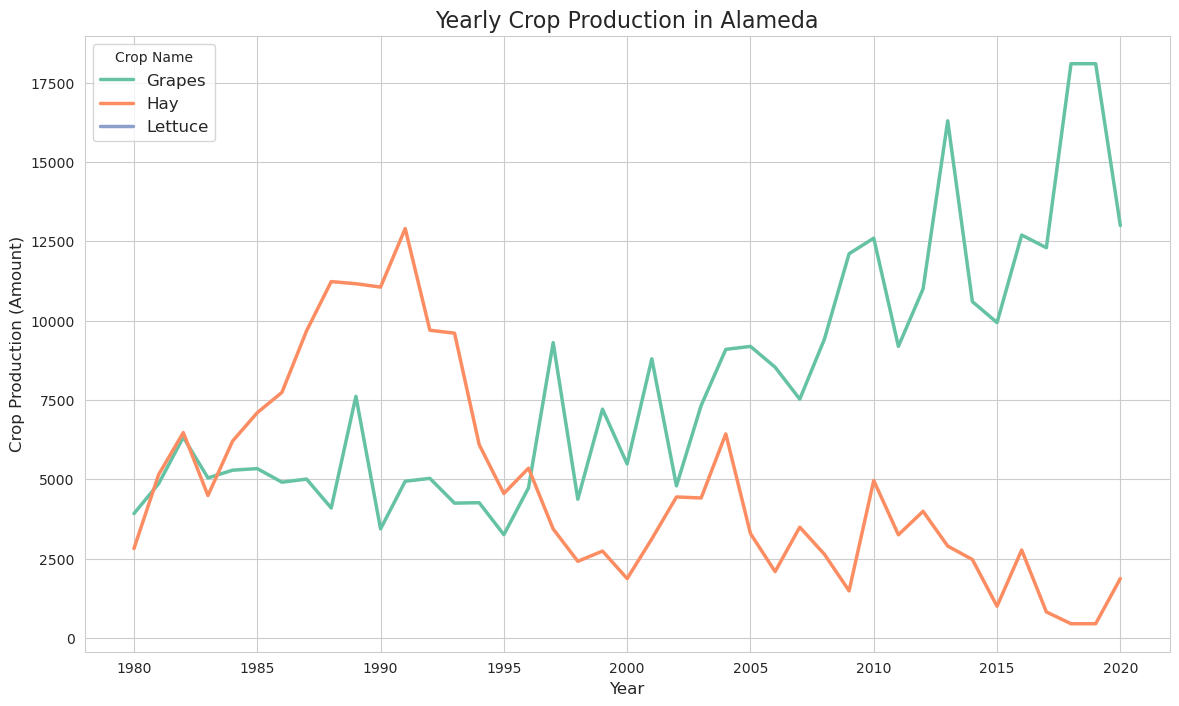

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Alameda County is being filtered and isolated so data can be observed and collected only on this county
alameda_data = Clean_Data[Clean_Data['County'] == 'Alameda']

# In this second part, the crops being displayed are being limited so there aren't a lot of lines present in the graph which could get confusing
crops_to_plot = ['Almonds', 'Hay', 'Tomatoes', 'Grapes', 'Pistachios', 'Rice',
       'Lettuce', 'Oranges', 'Strawberries', 'Carrots']  # Add your crop names here

# Additional research was done to find a style of graph that could input multiple lines in a line graph
plt.figure(figsize=(14, 8))

# This was a specific style found through research to add a theme to the line graph
sns.set_style("whitegrid")
sns.lineplot(data=alameda_data, x="Year", y="Production", hue="Crop Name", palette="Set2", linewidth=2.5)

# Here, the title names and axis names are being changed to be more clear to the reader
plt.title('Yearly Crop Production in Alameda', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production (Amount)', fontsize=12)


plt.legend(title="Crop Name", fontsize=12)


plt.show()

It seems that the overall trend between the production of hay in Alameda is that it gradually decreases over time. However, it seems that after 2020, it looks like there is an increase in production. As for the crop production of grapes, it seems that every half a decade, there is declining spike, but the production of grapes seems to increase overall throughout the decades. It would make sense that the amount of Hay is decreasing and the grape production is increasing in Alameda County because they are known for their beaches and wineries, meaning that there would be grape fields and less fields to grow and produce hay since hay is utilized for areas of farmland.

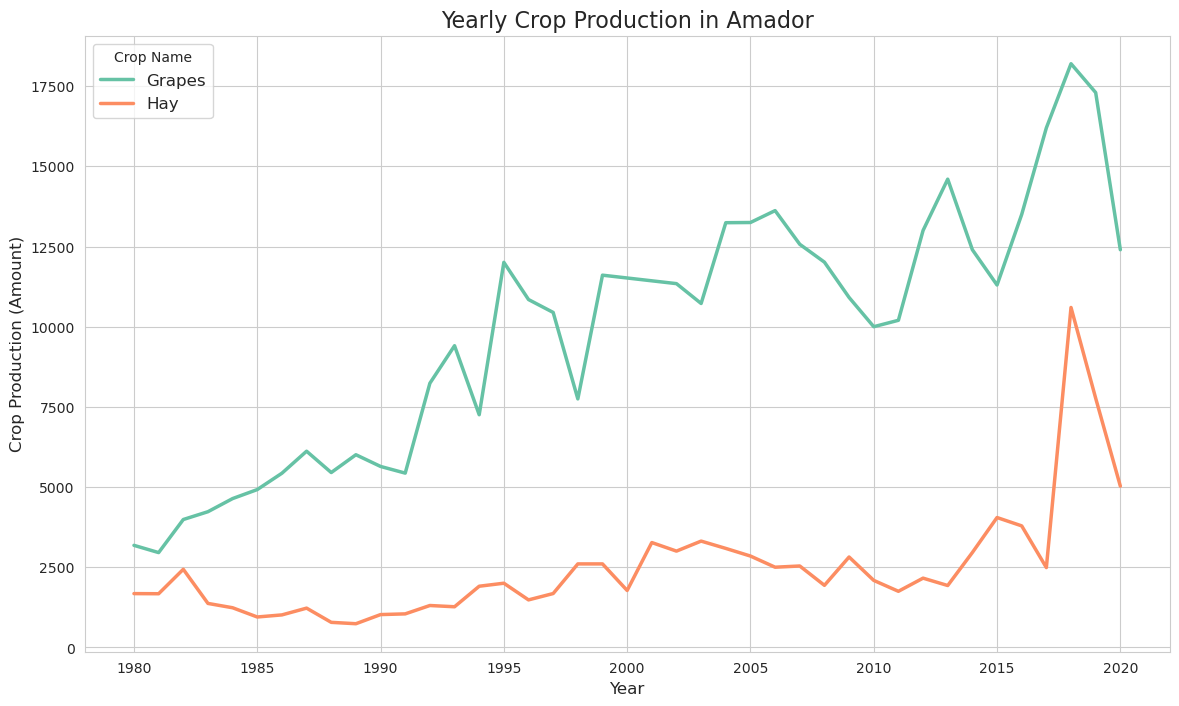

In [63]:

amador_data = Clean_Data[Clean_Data['County'] == 'Amador']

crops_to_plot = ['Almonds', 'Hay', 'Tomatoes', 'Grapes', 'Pistachios', 'Rice',
       'Lettuce', 'Oranges', 'Strawberries', 'Carrots']

plt.figure(figsize=(14, 8))

sns.set_style("whitegrid")
sns.lineplot(data=amador_data, x="Year", y="Production", hue="Crop Name", palette="Set2", linewidth=2.5)

plt.title('Yearly Crop Production in Amador', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production (Amount)', fontsize=12)

plt.legend(title="Crop Name", fontsize=12)

plt.show()

From the graph above, it can be seen that the production in grapes drastically increases while the production of hay has a gradual increase with a huge spike in production between 2015 to 2020, but drastically declines again afterwards. There is not enough research to entail why there was a sudden spike in hay production, but it does make sense that hay has not declined in production since Amador is known for being a historical town with open land. As for the increases production of grapes, this makes sense since Amador began incorporating more grape farms in order to create more wineries.

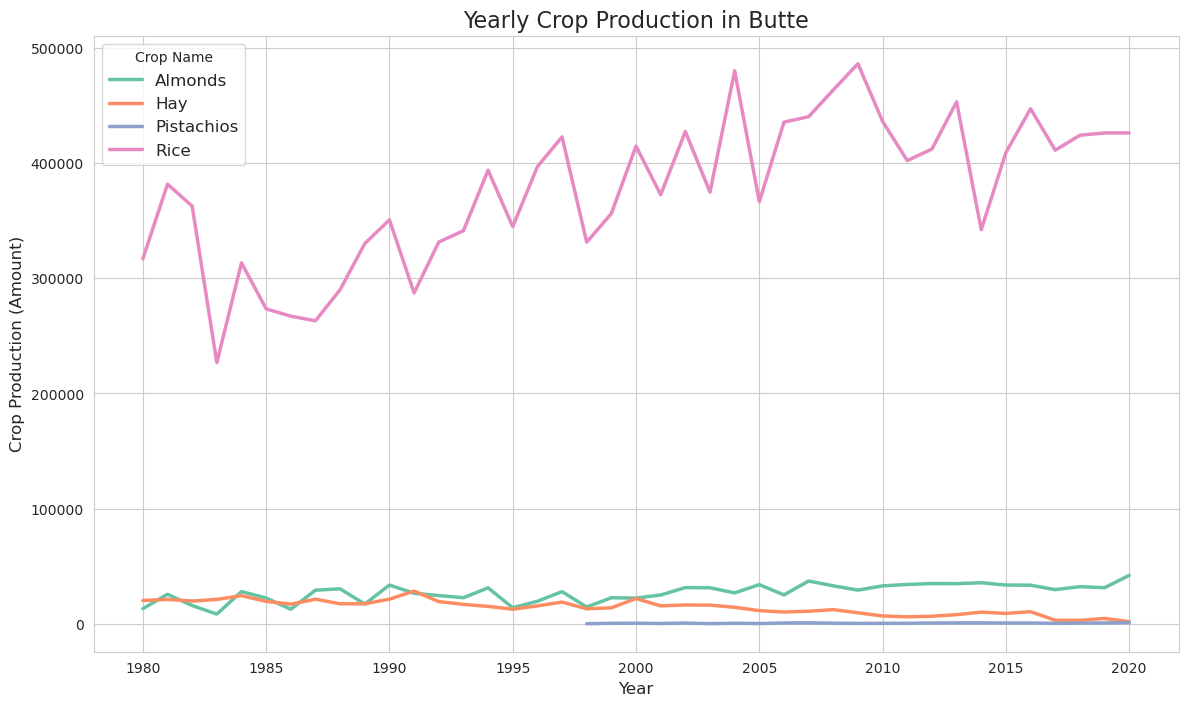

In [65]:
butte_data = Clean_Data[Clean_Data['County'] == 'Butte']

crops_to_plot = ['Almonds', 'Hay', 'Tomatoes', 'Grapes', 'Pistachios', 'Rice',
       'Lettuce', 'Oranges', 'Strawberries', 'Carrots']

plt.figure(figsize=(14, 8))

sns.set_style("whitegrid")
sns.lineplot(data=butte_data, x="Year", y="Production", hue="Crop Name", palette="Set2", linewidth=2.5)

plt.title('Yearly Crop Production in Butte', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production (Amount)', fontsize=12)

plt.legend(title="Crop Name", fontsize=12)


plt.show()

The only crop that seems to fluctuate in production is rice in Butte county. This makes sense since Butte County is known for holding a lot of California's agricultural history and having rice as one of their crops that is produced the most. However, a lot of Butte County consists of nature with limited amount of space used for farmland, which can explain why there is no drastic increase or decrease in the crops presented above.

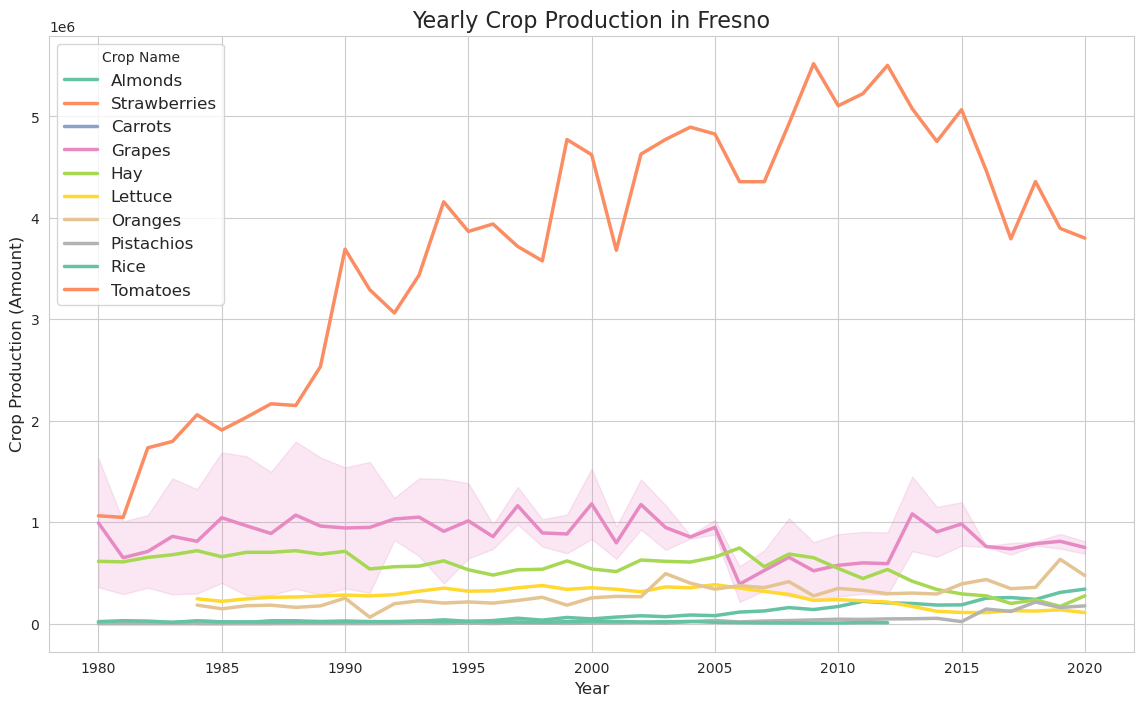

In [67]:
fresno_data = Clean_Data[Clean_Data['County'] == 'Fresno']

crops_to_plot = ['Almonds', 'Hay', 'Tomatoes', 'Grapes', 'Pistachios', 'Rice',
       'Lettuce', 'Oranges', 'Strawberries', 'Carrots']

plt.figure(figsize=(14, 8))

sns.set_style("whitegrid")
sns.lineplot(data=fresno_data, x="Year", y="Production", hue="Crop Name", palette="Set2", linewidth=2.5)

plt.title('Yearly Crop Production in Fresno', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production (Amount)', fontsize=12)

plt.legend(title="Crop Name", fontsize=12)

plt.show()

Looking at the graph, it is safe to say that tomatoes have the highest crop production amount in Fresno county in which its production drastically increases between 1980 and peaks between 2005-2013. As for the other crops, their crop production seems to stay pretty consistent with mo drastic increases or decreases. It makes sense that Fresno has a high number of tomato production because they are known to be a leading producer of tomatoes throughout the entire country. It also makes sense that grapes are their second leading crop in crop production since at one point, Fresno is given the nickname, "Raisin Capitol of the World".

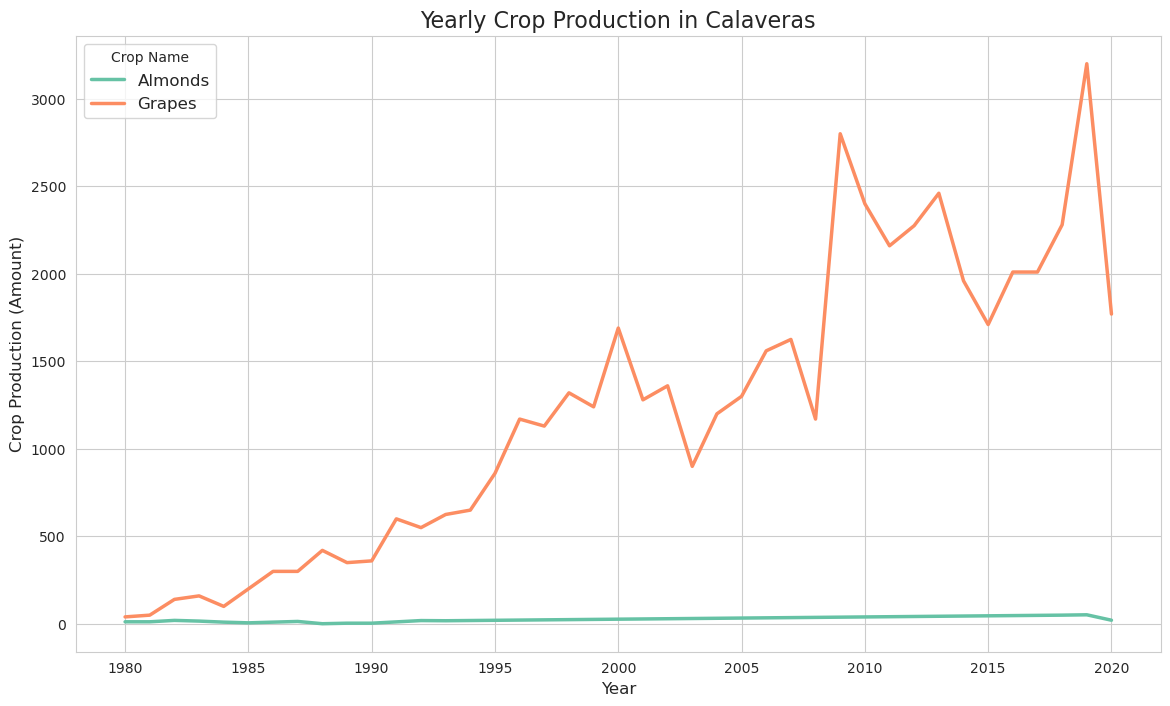

In [69]:
calaveras_data = Clean_Data[Clean_Data['County'] == 'Calaveras']

crops_to_plot = ['Almonds', 'Hay', 'Tomatoes', 'Grapes', 'Pistachios', 'Rice',
       'Lettuce', 'Oranges', 'Strawberries', 'Carrots']

plt.figure(figsize=(14, 8))

sns.set_style("whitegrid")
sns.lineplot(data=calaveras_data, x="Year", y="Production", hue="Crop Name", palette="Set2", linewidth=2.5)

plt.title('Yearly Crop Production in Calaveras', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production (Amount)', fontsize=12)

plt.legend(title="Crop Name", fontsize=12)

plt.show()

Given the location of Calaveras County in CA, it makes it a perfect location for the growth increase of grapes. Aside from being known for their caverns, they're also well known for the wineries which is why it makes sense to see an increase in grape production. It doesn't seem like there is much production of pistachios in Calaveras given there is no drastic increase over the span of 40 years.

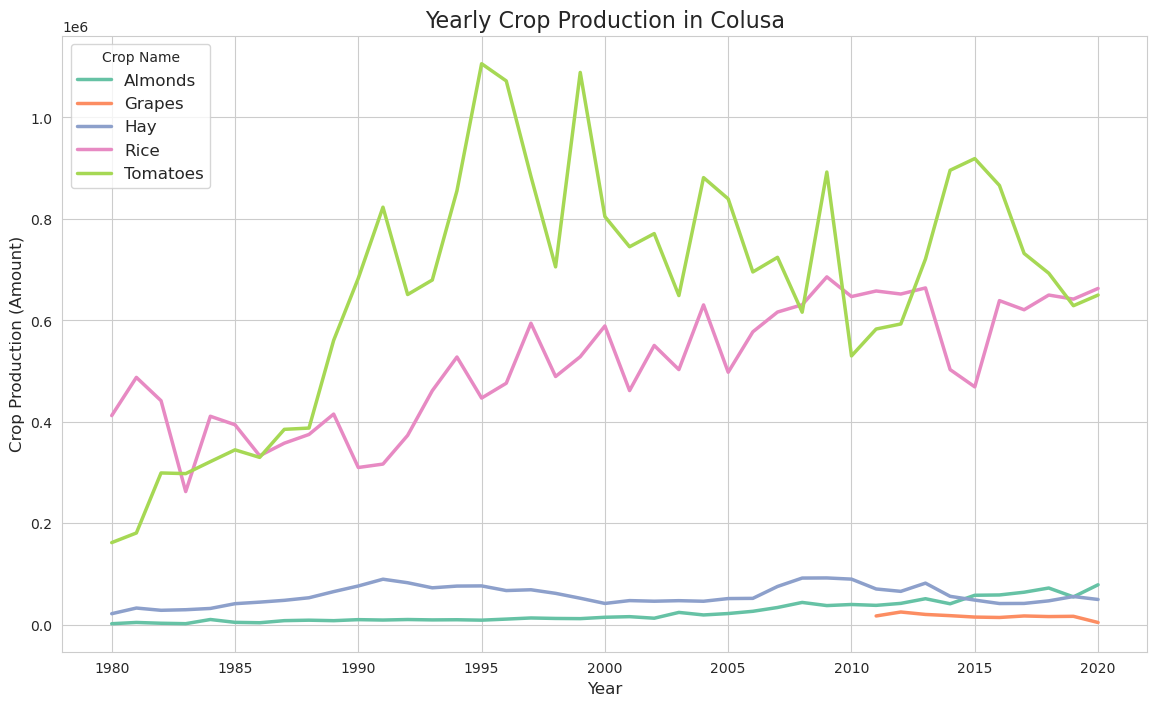

In [71]:
colusa_data = Clean_Data[Clean_Data['County'] == 'Colusa']

crops_to_plot = ['Almonds', 'Hay', 'Tomatoes', 'Grapes', 'Pistachios', 'Rice',
       'Lettuce', 'Oranges', 'Strawberries', 'Carrots']

plt.figure(figsize=(14, 8))

sns.set_style("whitegrid")
sns.lineplot(data=colusa_data, x="Year", y="Production", hue="Crop Name", palette="Set2", linewidth=2.5)

plt.title('Yearly Crop Production in Colusa', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production (Amount)', fontsize=12)

plt.legend(title="Crop Name", fontsize=12)


plt.show()

It seems there there is a fluctuation of crop growth between both tomatoes and rice in Colusa County. As for the other crops in the graph, hay, almonds, and grapes, their crop productions seem pretty consistent over the past 40 years. However, it can be seen that grape production growth wasn't accounted for until a little after 2010. Being known for their agricultural economy, they are most primarily known for their rice production which is why it makes sense that there is a steady increase of rice production. There are also a few wineries in the area that are well known throughout the community which can also explain why their grape production exceeds all the crops present in the graph above.

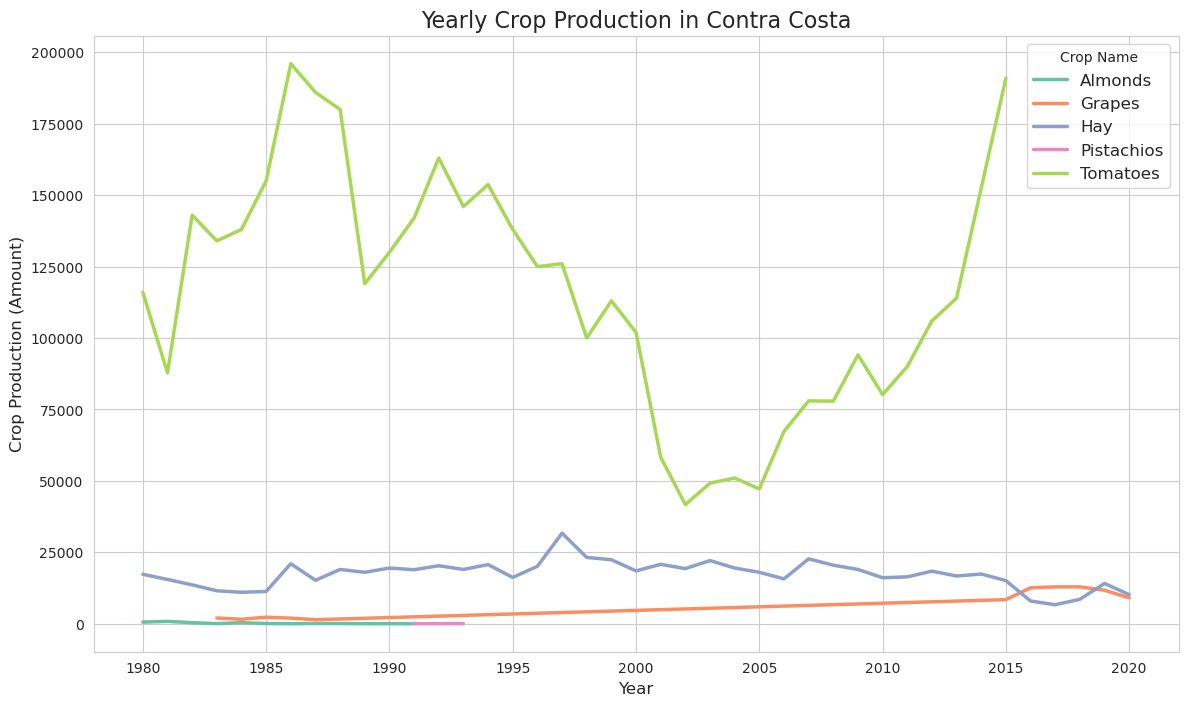

In [73]:
contra_costa_data = Clean_Data[Clean_Data['County'] == 'Contra Costa']

crops_to_plot = ['Almonds', 'Hay', 'Tomatoes', 'Grapes', 'Pistachios', 'Rice',
       'Lettuce', 'Oranges', 'Strawberries', 'Carrots']

plt.figure(figsize=(14, 8))

sns.set_style("whitegrid")
sns.lineplot(data=contra_costa_data, x="Year", y="Production", hue="Crop Name", palette="Set2", linewidth=2.5)

plt.title('Yearly Crop Production in Contra Costa', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production (Amount)', fontsize=12)

plt.legend(title="Crop Name", fontsize=12)

plt.show()

The last country observed is Contra Costa. Unlike the other graphs showing small spikes of decline in crop growth while continuing to have a positive trend, the crop growth production of tomatos drastically declines between the 1990's to 2005 from around 140,000 to around 45,000. Through further research, it was discovered that during this time, there was amassive drought in Contra Costa, severely impacting the crop production amount since there was not enough water to provide for all of the crops, especially for the tomatoes given that tomatoes are made mostly of water. However, for the other crops, it doesn't seem like there were too impacted by anything since they show a steady trendline in crop production throughout the decades.

## Proposed Question

The remainder of this analysis will be focused on determining whether we can find a correlation between the the Clim Div weather data and crop yield. In the interest of keeping the number of graphs reasonable, we will specifically be analyzing tomato yield in California and Fresno County, California. The analysis will be split into two parts. First, graphs will be made to determine if there are visible trends in Clim Div and Agricultural datasets. Second, linear regression models will be made to evaluate, reveal, or disprove any trends that may appear during graphing.

## Analysis and Results

Note we will be graphing and analyzing yield rather than raw production. Total production is directly affected by increases to the number of acres planted. Yield does not have the same problem, as it is already a normalized value that accounts for total acres planted/harvested. Using yield therefore helps us better isolate the effects of our known weather variables on crop output.

### Graphing

#### Load and Prepare Data

In [81]:
agdatapath = 'CaUsda/CaUsdaFull.csv'
tminpath = 'ClimDivData/climdiv_tmin_cty_clean_trim.csv'
tmaxpath = 'ClimDivData/climdiv_tmax_cty_clean_trim.csv'
tavgpath = 'ClimDivData/climdiv_tavg_cty_clean_trim.csv'
pcpnpath = 'ClimDivData/climdiv_pcpn_cty_clean_trim.csv'
tminstpath = 'ClimDivData/climdiv_tmin_st_clean_trim.csv'
tmaxstpath = 'ClimDivData/climdiv_tmax_st_clean_trim.csv'
tavgstpath = 'ClimDivData/climdiv_tavg_st_clean_trim.csv'
pcpnstpath = 'ClimDivData/climdiv_pcpn_st_clean_trim.csv'

#read tables
agdata_df = pd.read_csv(agdatapath)
tmin_df = pd.read_csv(tminpath)
tmax_df = pd.read_csv(tmaxpath)
tavg_df = pd.read_csv(tavgpath)
pcpn_df = pd.read_csv(pcpnpath)
tmin_st_df = pd.read_csv(tminstpath)
tmax_st_df = pd.read_csv(tmaxstpath)
tavg_st_df = pd.read_csv(tavgstpath)
pcpn_st_df = pd.read_csv(pcpnstpath)

In [82]:
#make full-year amalgamations of data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

pcpn_df['Yearly Precipitation'] = pcpn_df[months].sum(axis=1)
tavg_df['Yearly Average Temperature'] = tavg_df[months].sum(axis=1)/12
tmax_df['Yearly Max Temperature'] = tmax_df[months].max(axis=1)
tmin_df['Yearly Min Temperature'] = tmin_df[months].min(axis=1)

pcpn_st_df['Yearly Precipitation'] = pcpn_st_df[months].sum(axis=1)
tavg_st_df['Yearly Average Temperature'] = tavg_st_df[months].sum(axis=1)/12
tmax_st_df['Yearly Max Temperature'] = tmax_st_df[months].max(axis=1)
tmin_st_df['Yearly Min Temperature'] = tmin_st_df[months].min(axis=1)

In [83]:
show(pcpn_st_df)

#### Test crops and counties to help decide what to graph

In [85]:
#see potential crops
crops = list(agdata_df['Crop Name'].unique())
crops.sort()
crops

['ALMONDS ALL',
 'BERRIES STRAWBERRIES FRESH MARKET',
 'CARROTS FRESH MARKET',
 'GRAPES RAISIN',
 'GRAPES WINE',
 'HAY ALFALFA',
 'LETTUCE HEAD',
 'LETTUCE ROMAINE',
 'ORANGES NAVEL',
 'PISTACHIOS',
 'RICE MILLING',
 'TOMATOES PROCESSING']

Graphing is the easiest way to identify top producing counties for later graphs.

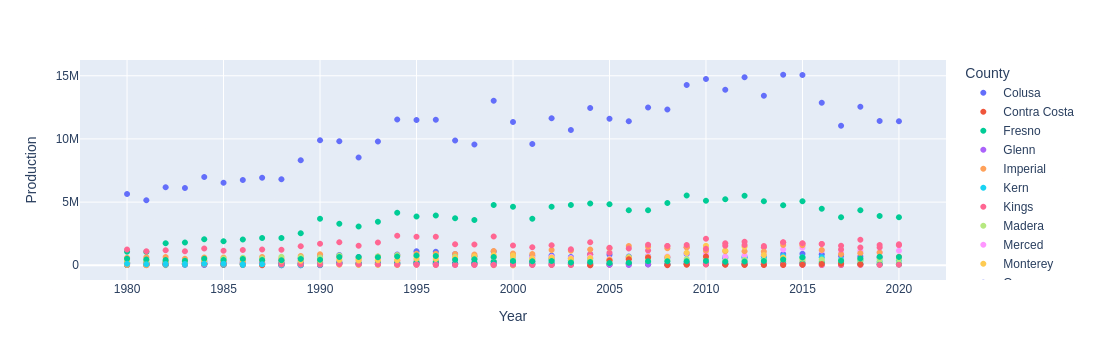

In [87]:
#graph crop to see top counties
fig = px.scatter(
    agdata_df[agdata_df['Crop Name'] =='TOMATOES PROCESSING'],
    x='Year',
    y='Production',
    color='County',
)

fig.show()

#### Define a couple graphing functions
make_pwt_graph() and make_pw_graph()

In [89]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_pwt_graph(title, agriculture_df: pd.DataFrame, ag_col: str, crop_name: str, county: list,
                           weather_data: list[list] = [], weather_axis_title="Temperature (°F)",
                           min_year=0, max_year=9999, year_offset=0):
    """
    Graphs production and weather data over time.
    
    Args:
        title: The title of the graph.
        agriculture_df: Agriculture DataFrame. Intended to be the CA Agricultural Commission table from the google drive.
        ag_col: The column to plot on the y-axis (i.e. 'Production', 'Yield', or 'Harvested Acres'). Can be a list or
            tuple where the second element is the units of the column.
        crop_name: The name of the crop to plot (e.g. 'TOMATOES PROCESSING')
        county: The county whose data to plot. Note that if 'State Total' is set, it will be assumed that the weather
            data will be from the statewide tables, and the state will be set to 'CA'.
        weather_data: This one is a bit complicated. It should consist of a list of lists/tuples in the following
            format: [[weather_df, weather_col, line_color]]
            Each weather_df should be a DataFrame containing data from one of the NOAA weather data tables.
            Each weather_col should be a str indicating the column to use in graphing. Each line_color is the
            color of the line on the graph. line_color is optional and defaults to orange.
        weather_axis_title: Set to specify title of weather axis.
        min_year: Set this if you don't want to show years before a given year.
        max_year: Set this if you don't want to show years after a given year.
        year_offset: Offset the years for weather data by a certain amount to account for delayed effects. The
            offset is added to the title automatically.
    """    
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    
    if isinstance(ag_col, list) or isinstance(ag_col, tuple):
        ag_units = ag_col[1]
        ag_col = ag_col[0]

    if year_offset!=0:
        title += f"<br><sup>Weather Data Offset by {year_offset} Years</sup>"
        
    fig.update_layout(
        title_text=title,
        title_x=0.5,
        width = 1000,
        height = 500
    )
        
    mask = (agriculture_df['Crop Name'] == crop_name) & (agriculture_df['County'] == county) & (agriculture_df['Year']>=min_year) & (agriculture_df['Year']<=max_year)
    ag_mask_df = agriculture_df[mask]
    fig.add_trace(
        go.Scatter(x=ag_mask_df['Year'], y=ag_mask_df[ag_col], name=ag_col, line_color='darkgreen', mode='lines',
                  line=go.scatter.Line(width=2.5)),
        secondary_y=False
    )

    for wdata in weather_data:
        wdf = wdata[0]
        wcol = wdata[1]
        color = "orange" if len(wdata) < 3 else wdata[2]

        #mask by state if using state totals data
        acol = 'State' if county=='State Total' else 'County'
        aval = 'CA' if county=='State Total' else county

        wdf = wdf.copy() 
        wdf['Year'] = wdf.loc[:,'Year']+year_offset
        
        mask = (wdf['Year']>=min_year)&(wdf['Year']<=max_year)&(wdf[acol]==aval)
        wdf = wdf[mask]

        wtrace = go.Scatter(
            x=wdf['Year'],
            y=wdf[wcol],
            line_color=color,
            opacity=0.5,
            name=wcol, mode='lines',
        )
    
        fig.add_trace(wtrace, secondary_y=True)

    
    fig.update_yaxes(title_text=f'{ag_col} ({ag_units})', secondary_y=False)
    fig.update_yaxes(title_text=weather_axis_title, secondary_y=True)
    fig.update_xaxes(title_text='Year')
        
    
    fig.show()

In [90]:
def make_pw_graphs(title: str, agriculture_df: pd.DataFrame, ag_col: str, crop_name: str, county: list,
                   weather_data: list = [], weather_axis_title='Precipitation (in)', min_year=0, max_year=9999, year_offset=0):
    """
    Only maps production against temperature, and only takes one weather_data rather than a list thereof.
    Otherwise basically the same.
    """
    if isinstance(ag_col, list) or isinstance(ag_col, tuple):
        ag_units = ag_col[1]
        ag_col = ag_col[0]
        
    if year_offset!=0:
        title += f"<br><sup>Weather Data Offset by {year_offset} Years</sup>"
        
    mask = (agriculture_df['Crop Name'] == crop_name) & (agriculture_df['County'] == county) & (agriculture_df['Year']>=min_year) & (agriculture_df['Year']<=max_year)
    ag_mask_df = agriculture_df[mask]

    wdf = weather_data[0]
    wcol = weather_data[1]
    wcolor = 'orange' if len(weather_data)<3 else weather_data[2]

    #mask by state if using state totals data
    acol = 'State' if county=='State Total' else 'County'
    aval = 'CA' if county=='State Total' else county

    
    wdf = wdf.copy() #being careful not to overwrite original df
    wdf.loc[:,'Year'] = wdf['Year']+year_offset
    
    mask = wdf[acol]==aval
    wdf = wdf[mask]
    
    pw_df = pd.merge(ag_mask_df[['Year', ag_col]], wdf[['Year', wcol]], how='inner', on='Year')
    pw_df = pw_df.sort_values(by=wcol)

    ag_colname = f'{ag_col} ({ag_units})'
    pw_df[ag_colname] = pw_df[ag_col]

    fig = px.scatter(
        pw_df,
        x=wcol,
        y=ag_colname,
        hover_data='Year',
        trendline='ols'
    )

    fig.update_layout(
        title_text=title,
        title_x=0.5,
        xaxis_title=weather_axis_title
    )

    fig.show()

#### Tomatoes Processing in Fresno County
These graphs will analyze trends in the yield of of tomatoes in Fresno county.

In [92]:
tcrop= 'TOMATOES PROCESSING'
tstat = ['Yield', 'Tons/Acre']
tcounty = 'Fresno'

##### Temperature
We will first look at temperature vs yield.

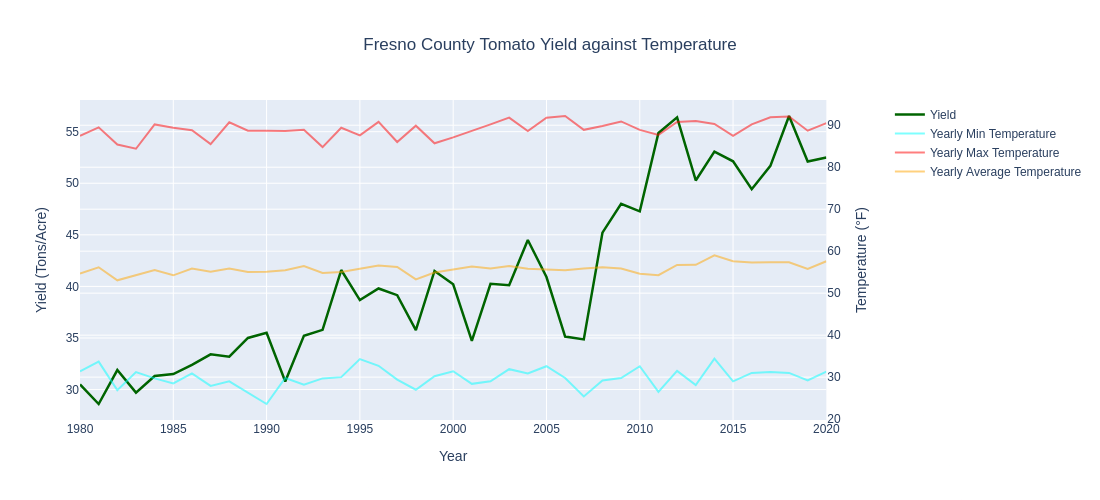

In [94]:
temp_data = [
    [tmin_df, 'Yearly Min Temperature', 'aqua'],
    [tmax_df, 'Yearly Max Temperature', 'red'],
    [tavg_df, 'Yearly Average Temperature', 'orange']
]

make_pwt_graph(
    title=f"Fresno County Tomato {tstat[0]} against Temperature",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = temp_data,
    min_year=1980,
    max_year=2020
)

The above graph shows that despite the effects of climate change, tomato yields has seemed to increase steadily between 1980 and 2020. This is probably the result of continual advances in agricultural technology. It is hard to say whether smaller fluctuations in the overall trend can be attributed to temperature differences, and so that will be tested with the next graphs.

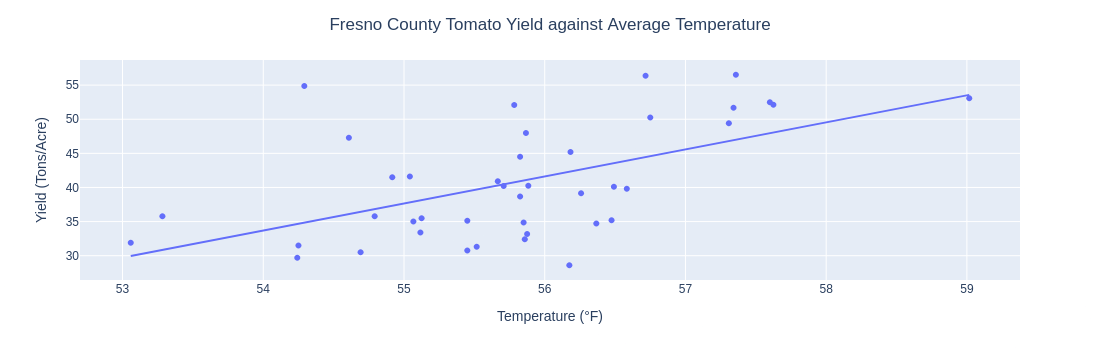

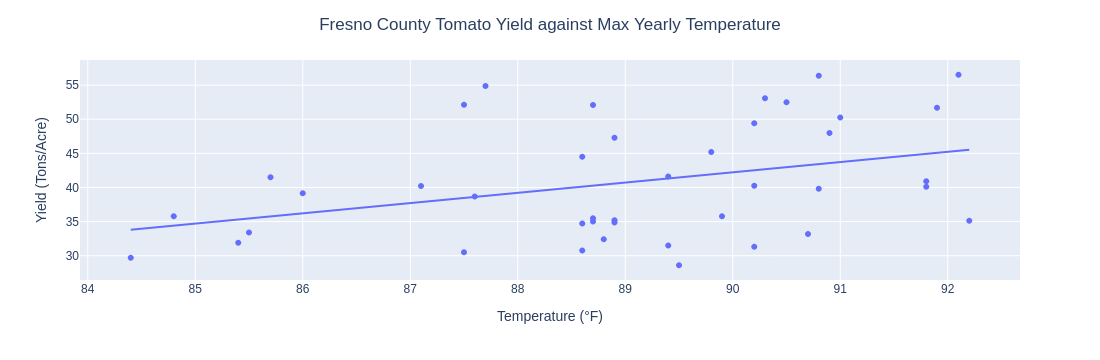

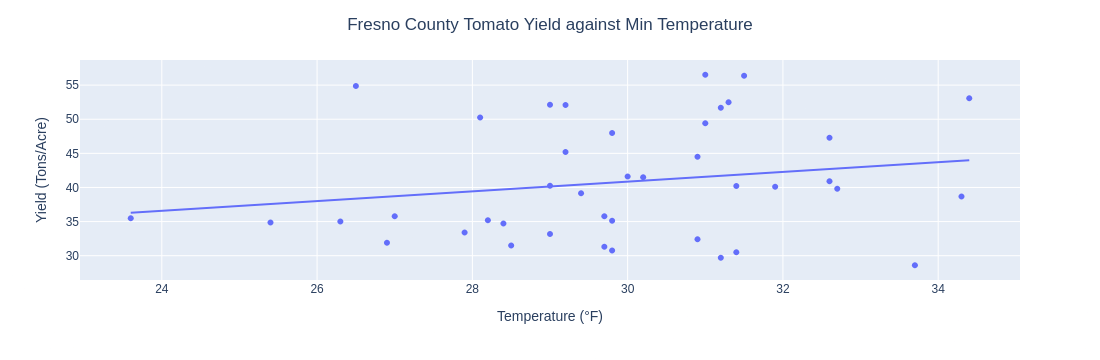

In [96]:
make_pw_graphs(
    title=f"Fresno County Tomato {tstat[0]} against Average Temperature",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [tavg_df, 'Yearly Average Temperature'],
    weather_axis_title='Temperature (°F)',
    max_year=2020,
)

make_pw_graphs(
    title=f"Fresno County Tomato {tstat[0]} against Max Yearly Temperature",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [tmax_df, 'Yearly Max Temperature'],
    weather_axis_title='Temperature (°F)',
    max_year=2020,
)

make_pw_graphs(
    title=f"Fresno County Tomato {tstat[0]} against Min Temperature",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [tmin_df, 'Yearly Min Temperature'],
    weather_axis_title='Temperature (°F)',
    max_year=2020,
)

The trendlines of the graphs indicate that as temperature increases, tomato production also increases, but visual inspection of the graphs indicates there is lots of noise. If the trend is true, though, it is be plausible that tomatoes prefer warmer temperatures.

##### Precipitation
Now we will look at precipitation.

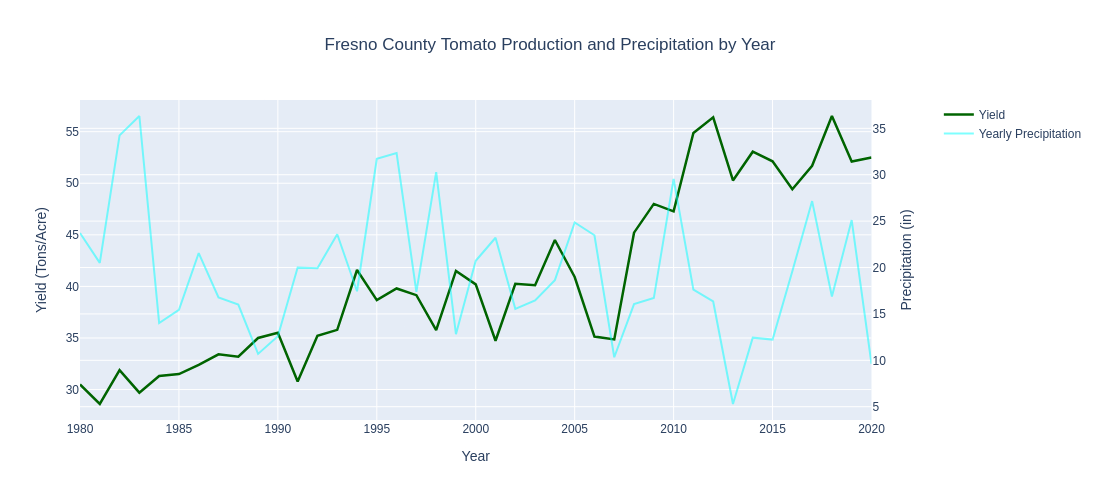

In [99]:
make_pwt_graph(
    title="Fresno County Tomato Production and Precipitation by Year",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [[pcpn_df, 'Yearly Precipitation', 'aqua']],
    weather_axis_title='Precipitation (in)',
    min_year=1980,
    max_year=2020,
    year_offset=0
)

This graph does not seem to show much real correlation between precipitation and tomato production. Since water is generally sourced from reservoirs or groundwater, it may be more worthwhile to offset the precipitation data by a few years to account for delays in the effects of low precipitation.

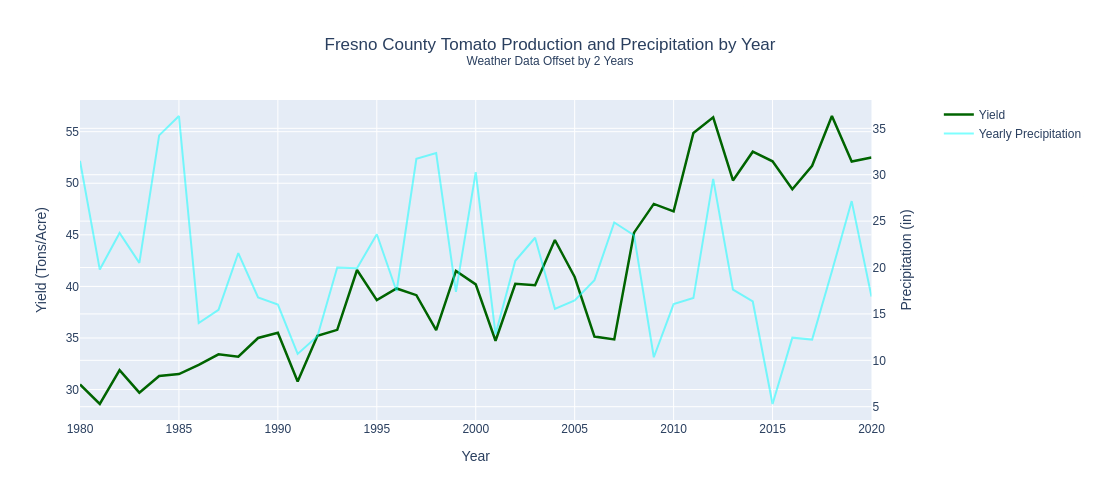

In [101]:
make_pwt_graph(
    title="Fresno County Tomato Production and Precipitation by Year",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [[pcpn_df, 'Yearly Precipitation', 'aqua']],
    weather_axis_title='Precipitation (in)',
    min_year=1980,
    max_year=2020,
    year_offset=2
)

The offset of 1 year seems to create some alignment between high yield and high precipitation in later years, but otherwise does not seem to have improved correlation greatly.

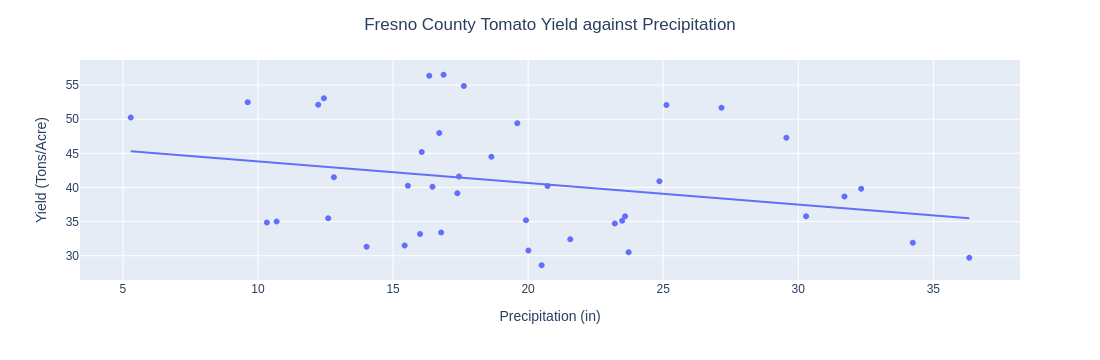

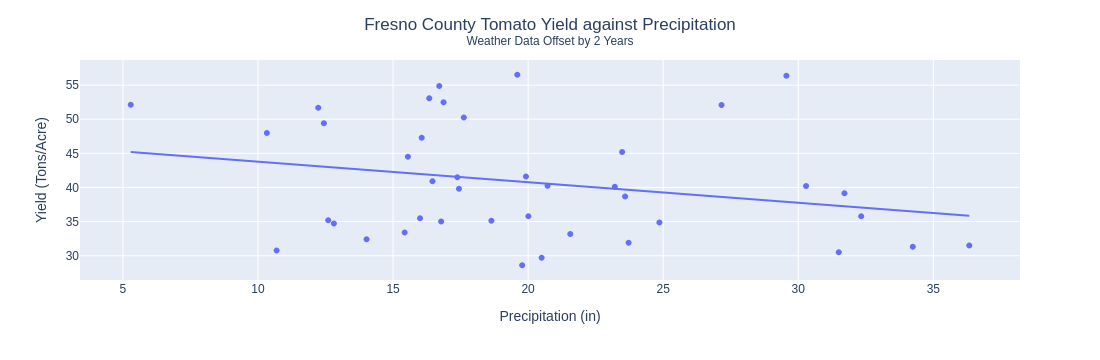

In [103]:
make_pw_graphs(
    title=f"Fresno County Tomato {tstat[0]} against Precipitation",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [pcpn_df, 'Yearly Precipitation'],
    weather_axis_title='Precipitation (in)',
    min_year=1980,
    max_year=2020,
    year_offset=0
)
make_pw_graphs(
    title=f"Fresno County Tomato {tstat[0]} against Precipitation",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [pcpn_df, 'Yearly Precipitation'],
    weather_axis_title='Precipitation (in)',
    min_year=1980,
    max_year=2020,
    year_offset=2
)

The trendlines of these graphs indicate that increased precipitation actually decreases tomato yield. This is unexpected considering more water is generally a good thing when growing crops. It is again possible that the result is a side effect of too much noise.

#### Tomatoes Processing Statewide
These graphs will analyze trends in the yield of of tomatoes across California.

In [106]:
tcrop= 'TOMATOES PROCESSING'
tcounty = 'State Total'
tstat = ['Yield', 'Tons/Acre']

##### Temperature
We will repeate the Fresno temperature graphs.

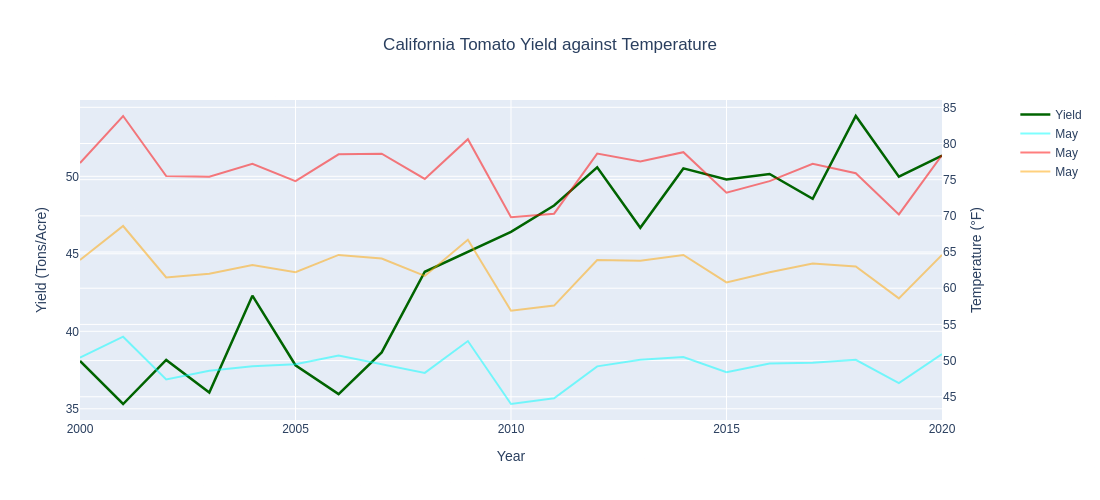

In [108]:
make_pwt_graph(
    title=f"California Tomato {tstat[0]} against Temperature",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [[tmin_st_df, 'May', 'aqua'], [tmax_st_df, 'May', 'red'], [tavg_st_df, 'May', 'orange']],
    min_year=2000,
    max_year=2020
)

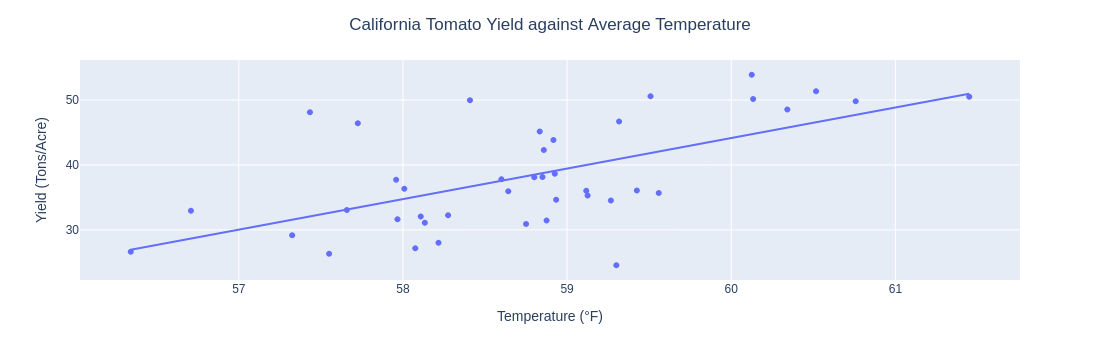

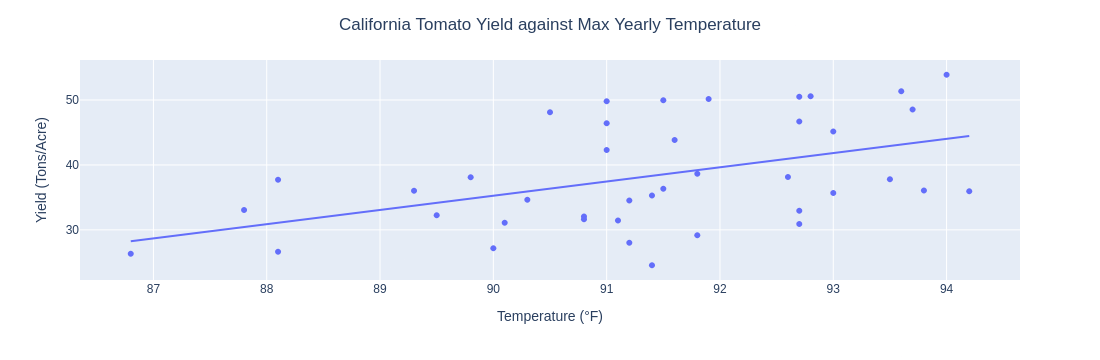

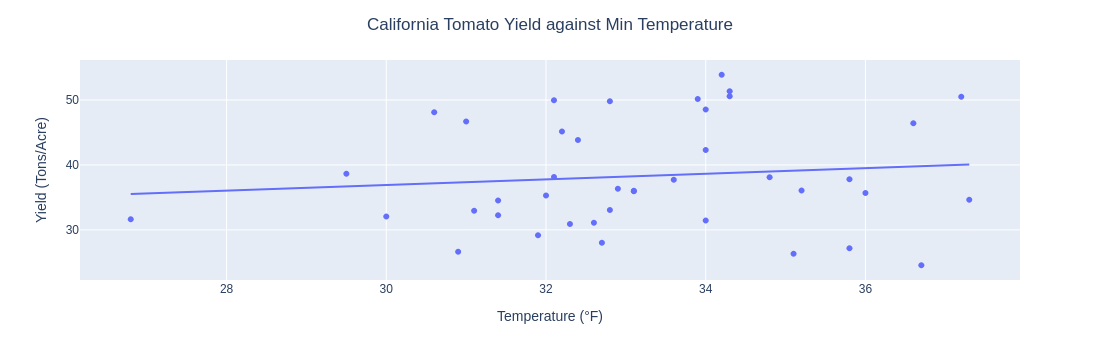

In [109]:
make_pw_graphs(
    title=f"California Tomato {tstat[0]} against Average Temperature",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [tavg_st_df, 'Yearly Average Temperature'],
    weather_axis_title='Temperature (°F)',
    min_year=1980,
    max_year=2020,
    year_offset=0
)

make_pw_graphs(
    title=f"California Tomato {tstat[0]} against Max Yearly Temperature",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [tmax_st_df, 'Yearly Max Temperature'],
    weather_axis_title='Temperature (°F)',
    min_year=1980,
    max_year=2020,
    year_offset=0
)

make_pw_graphs(
    title=f"California Tomato {tstat[0]} against Min Temperature",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [tmin_st_df, 'Yearly Min Temperature'],
    weather_axis_title='Temperature (°F)',
    min_year=1980,
    max_year=2020,
    year_offset=0
)

These graphs indicate similar trends to the ones made for Fresno alone.

##### Precipitation
We will again repeat the Fresno graphs.

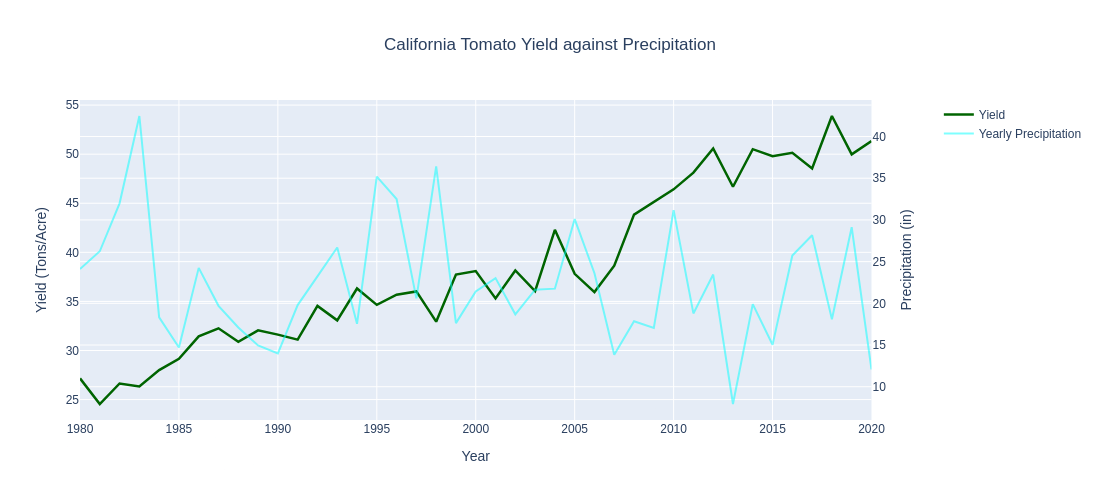

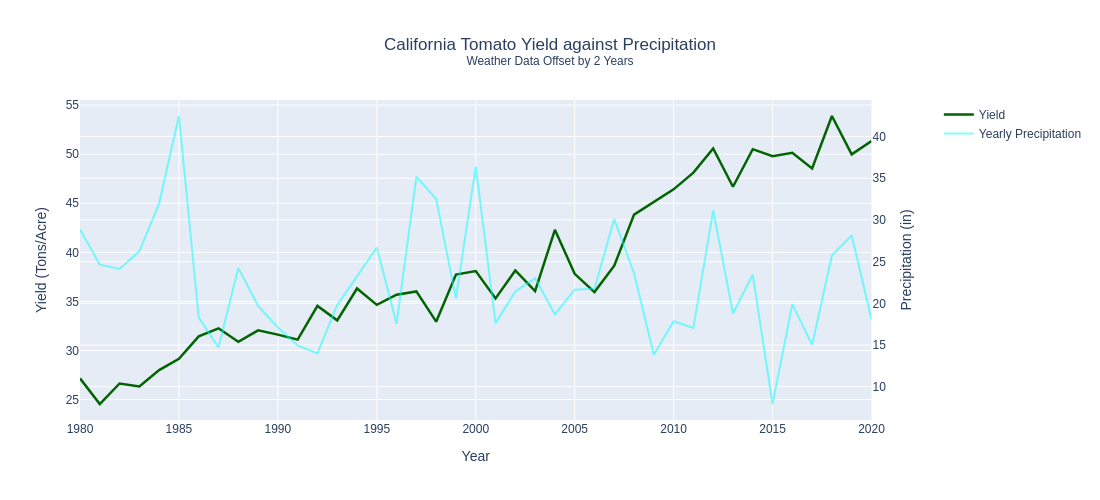

In [112]:
make_pwt_graph(
    title=f"California Tomato {tstat[0]} against Precipitation",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [[pcpn_st_df, 'Yearly Precipitation', 'aqua']],
    weather_axis_title='Precipitation (in)',
    min_year=1980,
    max_year=2020,
    year_offset=0
)

make_pwt_graph(
    title=f"California Tomato {tstat[0]} against Precipitation",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [[pcpn_st_df, 'Yearly Precipitation', 'aqua']],
    weather_axis_title='Precipitation (in)',
    min_year=1980,
    max_year=2020,
    year_offset=2
)

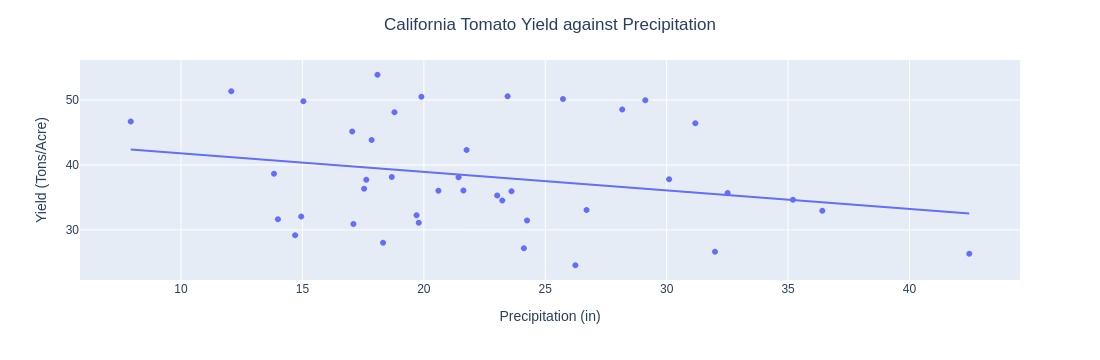

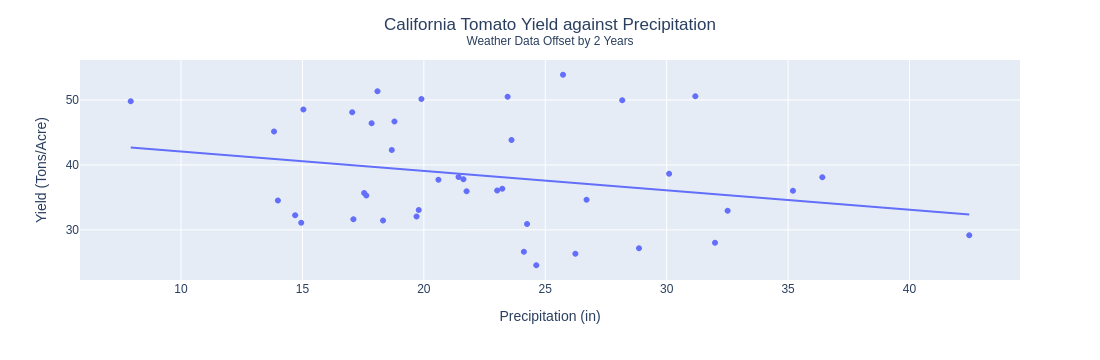

In [113]:
make_pw_graphs(
    title=f"California Tomato {tstat[0]} against Precipitation",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [pcpn_st_df, 'Yearly Precipitation'],
    weather_axis_title='Precipitation (in)',
    min_year=1980,
    max_year=2020,
    year_offset=0
)

make_pw_graphs(
    title=f"California Tomato {tstat[0]} against Precipitation",
    agriculture_df = agdata_df,
    ag_col = tstat,
    crop_name = tcrop,
    county = tcounty,
    weather_data = [pcpn_st_df, 'Yearly Precipitation'],
    weather_axis_title='Precipitation (in)',
    min_year=1980,
    max_year=2020,
    year_offset=2
)

Again, the graphs are very similar to the ones made for Fresno.

### Modeling
We will use Scipy linear regression models to further the analysis.

#### Loading and Initial Preparation of Data

In [117]:
agdatapath = 'CaUsda/CaUsdaFull.csv'
tavgpath = 'ClimDivData/climdiv_tavg_cty_clean_trim.csv'
pcpnpath = 'ClimDivData/climdiv_pcpn_cty_clean_trim.csv'
tavgstpath = 'ClimDivData/climdiv_tavg_st_clean_trim.csv'
pcpnstpath = 'ClimDivData/climdiv_pcpn_st_clean_trim.csv'

#read tables
agdata_df = pd.read_csv(agdatapath)
tavg_df = pd.read_csv(tavgpath)
pcpn_df = pd.read_csv(pcpnpath)
tavg_st_df = pd.read_csv(tavgstpath)
pcpn_st_df = pd.read_csv(pcpnstpath)

In [118]:
#make full-year amalgamations of data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

pcpn_df['Yearly Precipitation'] = pcpn_df[months].sum(axis=1)
tavg_df['Yearly Average Temperature'] = tavg_df[months].sum(axis=1)/12

pcpn_st_df['Yearly Precipitation'] = pcpn_st_df[months].sum(axis=1)
tavg_st_df['Yearly Average Temperature'] = tavg_st_df[months].sum(axis=1)/12

#### Make convenience functions

The following function will help to create merged dataframes with all desired data.

In [121]:
def join_ag_pcpn_temp(ag_df, pcpn_df, temp_df):
    """Quick convenience function for merging the data tables.."""
    merge_df = pd.merge(
        ag_df[['Year', 'Crop Name', 'Production', 'Yield']],
        pcpn_df[['Year', 'Yearly Precipitation']],
        how='inner', on='Year'
    )
    
    merge_df = pd.merge(
        merge_df,
        ca_tavg_df[['Year', 'Yearly Average Temperature']],
        how='inner', on='Year'
    )

    return merge_df

The following function will make a model and create graphs to help evaluate its fit.

In [123]:
from sklearn.linear_model import LinearRegression

def mk_linmod(model_df, x_cols: list[str], y_col: str):
    """This function will train a model and display statistics and graphs about it"""
    #make model
    X = model_df[x_cols].values.reshape(-1,len(x_cols))
    y = model_df[y_col]
    
    lm = LinearRegression()
    lm.fit(X, y)
    
    print(f'Model Statistics:\nSlope: {lm.coef_}\nIntercept: {lm.intercept_}\nR^2: {lm.score(X,y)}\naR^2: {ar2(lm, X, y, x_cols, model_df)}')

    #predictions vs residuals graph
    pred_col = f'{y_col}_predicted'
    res_col = f'{y_col}_residual'
    
    model_df[pred_col] = lm.predict(X)
    model_df[res_col] = model_df[y_col]-model_df[pred_col]
    
    fig = px.scatter(model_df, x=pred_col, y=res_col)
    fig.update_layout(
        title=f'Residual as a Function of Predicted {y_col}',
        title_x=0.5,
        yaxis={'zeroline':True, 'zerolinecolor':'black'},
        yaxis_title='Residual',
        xaxis_title=f'Predicted {y_col}'
    )
    
    fig.show()

    # Make graph with prediction line if possible
    if len(x_cols)==1:
        fig = px.scatter(model_df, x=x_cols[0], y=y_col)
        
        fig.add_trace(
            px.line(model_df, x=x_cols[0], y=pred_col ,color_discrete_sequence=['black']).data[0]
        )
        
        fig.show()

    return lm


def ar2(lm, X, y, cols, df):
    r2 =  lm.score(X,y)
    k = len(cols)
    n = len(df)
    ar2 = 1-((1-r2)*(n-1)/(n-k-1))
    return ar2

#### State Analysis

##### Data Preparation

We are focusing on state totals for tomato production in California and will mask the data as such.

In [127]:
agdata_mask = (agdata_df['County']=='State Total')&(agdata_df['Crop Name']=='TOMATOES PROCESSING')
ca_agdata = agdata_df[agdata_mask]

ca_pcpn_df = pcpn_st_df[pcpn_st_df['State']=='CA']
ca_tavg_df = tavg_st_df[tavg_st_df['State']=='CA']

We also need to join the agriculture, precipitation, and temperature data tables to prepare their use in the model.

In [129]:
model_df = join_ag_pcpn_temp(ca_agdata, ca_pcpn_df, ca_tavg_df)

show(model_df)

The crop statistic we are trying to predict is yield.

In [131]:
cstat = 'Yield'

##### Average Temperature
We will first look at average temperature against crop production.

Model Statistics:
Slope: [4.70709508]
Intercept: -238.27022164337026
R^2: 0.364538470165511
aR^2: 0.34824458478513953


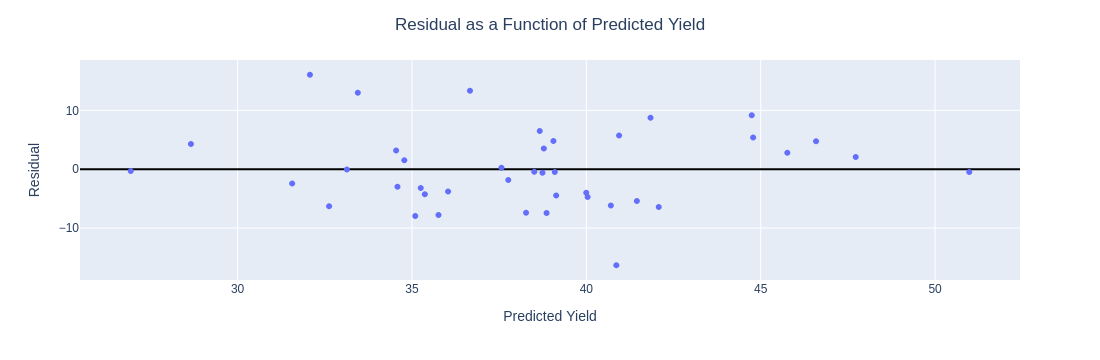

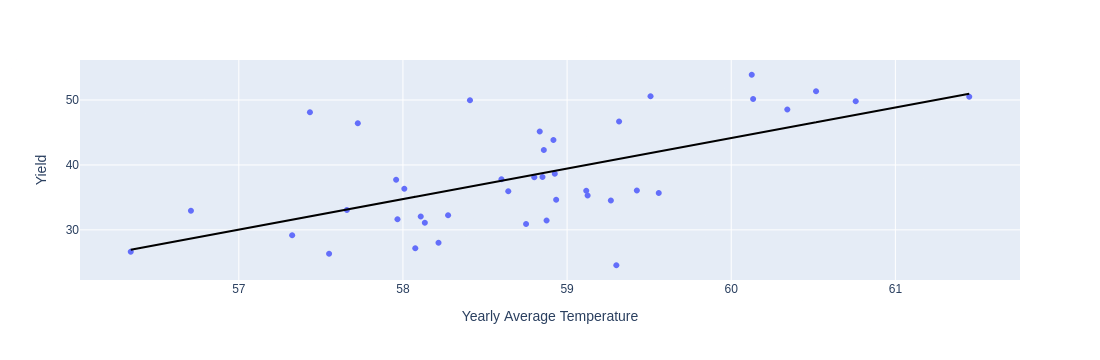

In [133]:
lm = mk_linmod(
    model_df,
    x_cols = ['Yearly Average Temperature'],
    y_col=cstat
)

The model's R squared score of about 0.36 indicates it is weak fit for the data. If we assume the model retains some truth, we may conclude that tomatoes have some preference towards hotter temperatures. Otherwise we may conclude that temperature has no real effect on tomato output. Likely farmers plant heat-resistant crop varieties and have other practices to prevent high heat from adversely affecting their crop.

##### Precipitation

Model Statistics:
Slope: [-0.28551664]
Intercept: 44.65715288714691
R^2: 0.061745872351832154
aR^2: 0.03768807420700737


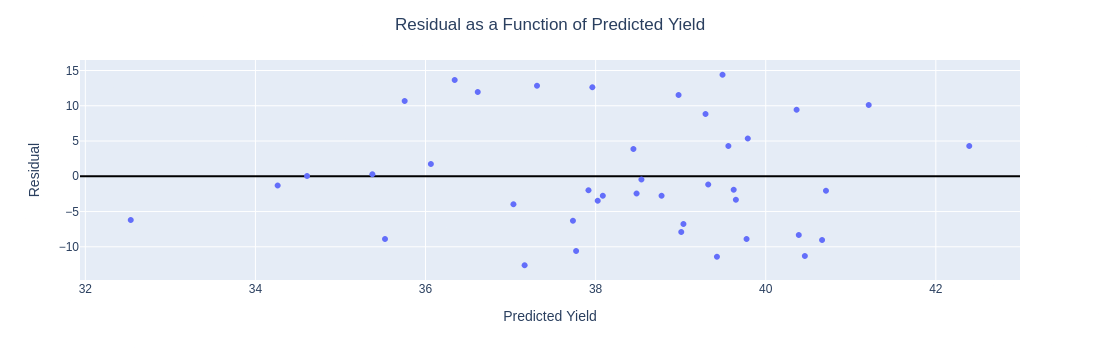

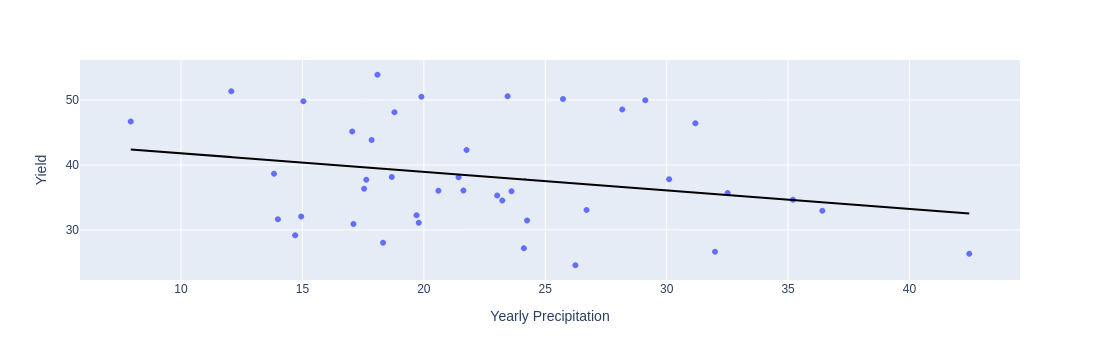

In [136]:
lm = mk_linmod(
    model_df,
    x_cols = ['Yearly Precipitation'],
    y_col=cstat
)

The model's R squared score of 0.06 shows that the model is a terrible fit for the data. This makes sense considering if it was a better fit it would once again indicate that crop yield somehow increases when there is less water.

Just in case, we can again look at the data with a time offset.

Model Statistics:
Slope: [-0.29865605]
Intercept: 45.04025862091482
R^2: 0.06405058912944661
aR^2: 0.04005188628661194


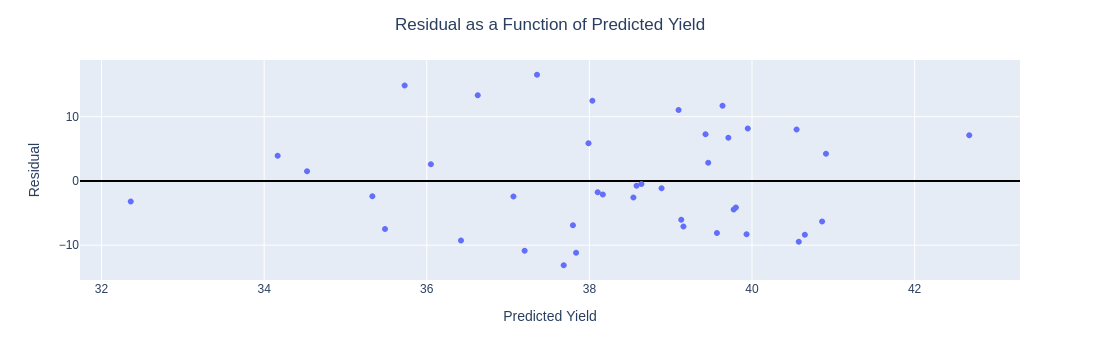

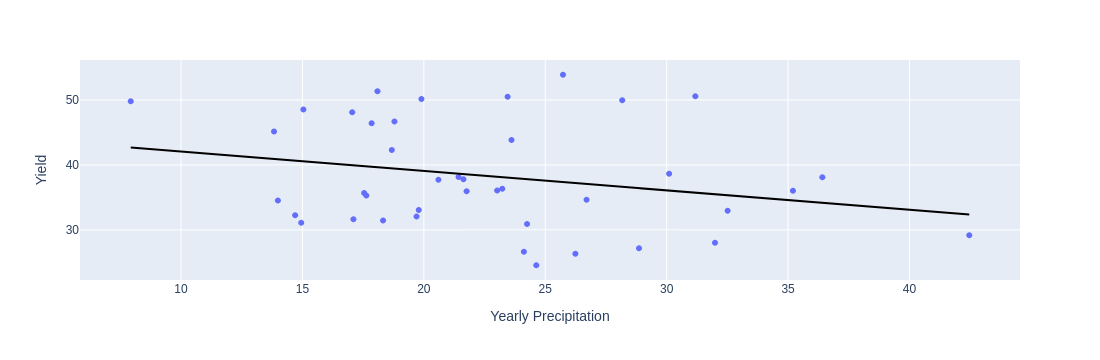

In [139]:
pcpn_off_df = ca_pcpn_df.copy()
pcpn_off_df['Year'] = pcpn_off_df['Year']+2

model_offset_df = join_ag_pcpn_temp(ca_agdata, pcpn_off_df, ca_tavg_df)

lm = mk_linmod(
    model_offset_df,
    x_cols = ['Yearly Precipitation'],
    y_col=cstat
)

Offsetting the data did not improve the model's fit. This would therefore lead us to conclude that yearly precipitation in fact has no real effect on the yield of tomato crops. This is likely attributable to the fact that most fresh water is sourced from groundwater. Groundwater acts as a reserve of water that California's counties can draw from during times with low active precipitation, meaning that farmers can largely ignore the effects of minor droughts and continue producing at close-to-full capacity.

##### Time
Now we will look at time.

Model Statistics:
Slope: [0.66233275]
Intercept: -1286.3862369337983
R^2: 0.9230026401157515
aR^2: 0.9210283488366682


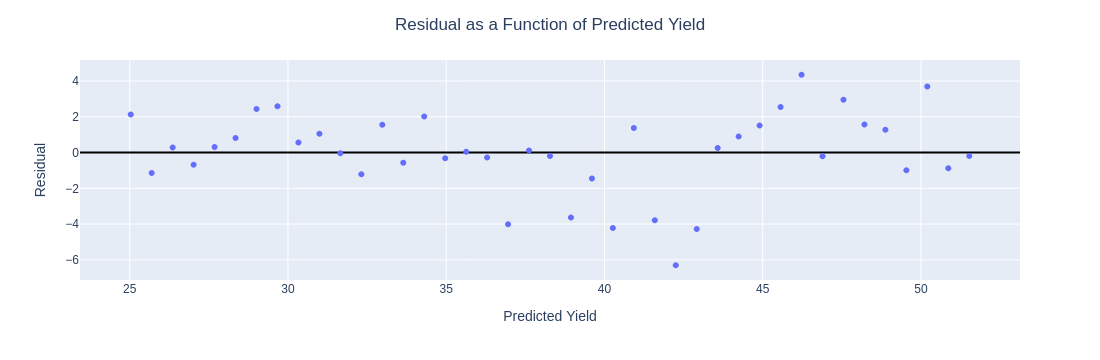

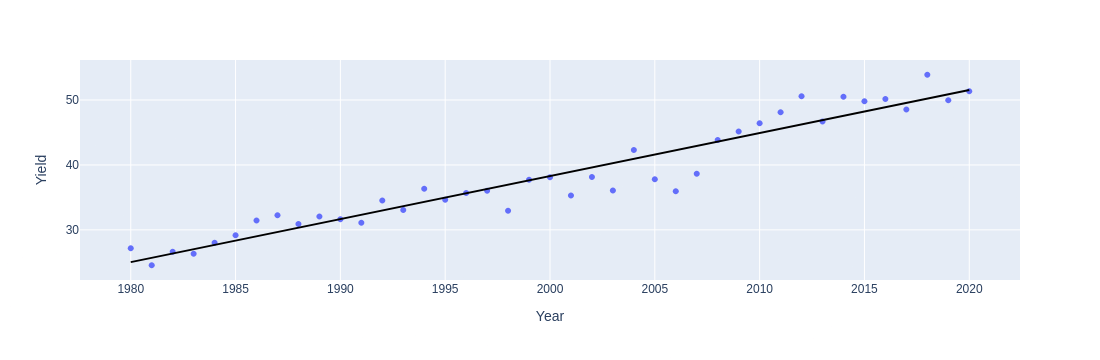

In [142]:
lm = mk_linmod(
    model_df,
    x_cols = ['Year'],
    y_col=cstat
)

With an R squared score of 0.92, it seems that this model is by far the best fit for the data, far outclassing the temperature and precipitation models. It seems that the improvements in agricultural efficiency have far outstripped the effects of climate change.

##### Multiple Variables
We can do a last model using all variables to see if it improves the adjusted R squared score at all.

Model Statistics:
Slope: [0.63635275 0.50288107]
Intercept: -1263.9713207842342
R^2: 0.925743223390779
aR^2: 0.9218349719902936


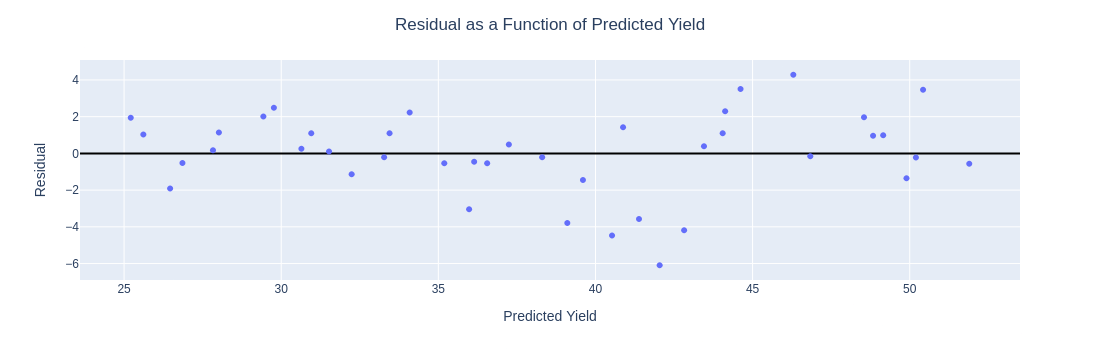

In [145]:
lm = mk_linmod(
    model_df,
    x_cols = ['Year', 'Yearly Average Temperature'],
    y_col=cstat
)

Whereas the adjusted R squared of the Year-only model had a score of 0.9210, this model has a score of 0.9218. The increase is only 0.0008, which is inconsequential. Again, it seems crop production is far more influenced by innovation than temperature.

#### Fresno County Analysis
This is just a repeat of the statewide analysis to confirm that the trends shown still hold in Fresno.

##### Data Preparation
This is the same as in the state analysis, save that we are masking to Fresno.

In [149]:
agdata_mask = (agdata_df['County']=='Fresno')&(agdata_df['Crop Name']=='TOMATOES PROCESSING')
fs_agdata = agdata_df[agdata_mask]

fs_pcpn_df = pcpn_df[pcpn_df['County']=='Fresno']
fs_tavg_df = tavg_df[tavg_df['County']=='Fresno']

In [150]:
model_df = join_ag_pcpn_temp(fs_agdata, fs_pcpn_df, fs_tavg_df)

show(model_df)

The crop statistic we are trying to predict is yield.

In [152]:
cstat = 'Yield'

##### Average Temperature
We will first look at average temperature against crop production.

Model Statistics:
Slope: [4.31717117]
Intercept: -212.87448482220248
R^2: 0.296991226952557
aR^2: 0.27896536097698155


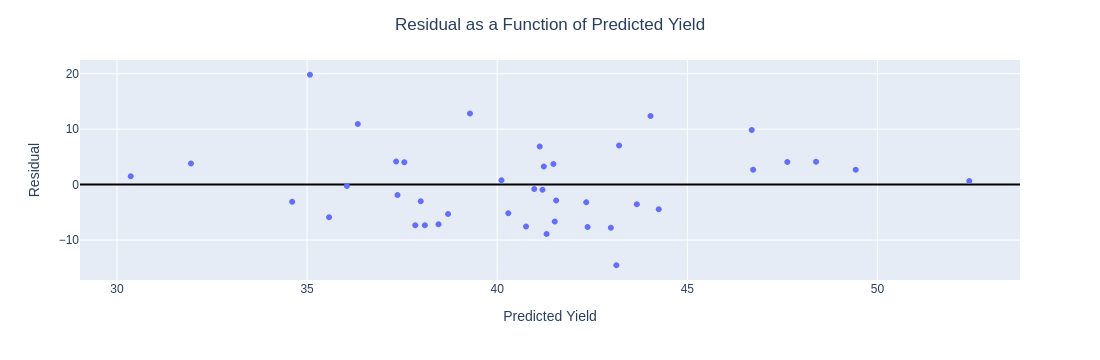

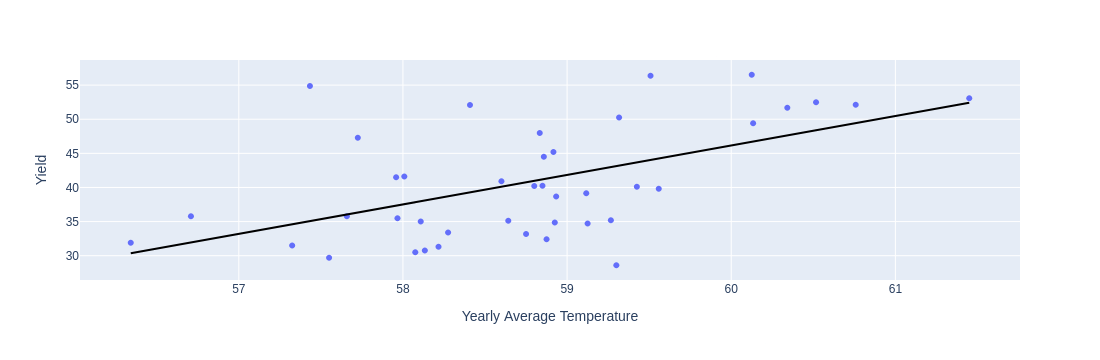

In [154]:
lm = mk_linmod(
    model_df,
    x_cols = ['Yearly Average Temperature'],
    y_col=cstat
)

In Fresno, the R squared score of the temperature is about 0.30, even less than in that of the statewide model. 

##### Precipitation

Model Statistics:
Slope: [-0.31643347]
Intercept: 46.98094049976284
R^2: 0.07174494211078097
aR^2: 0.04794353037003185


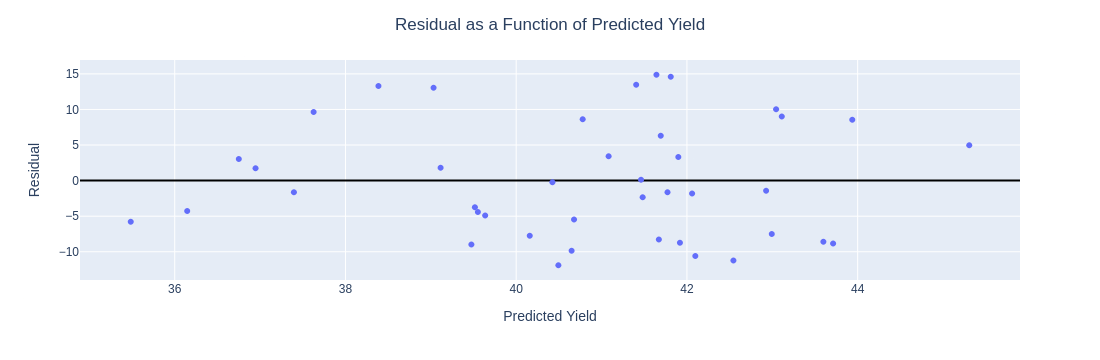

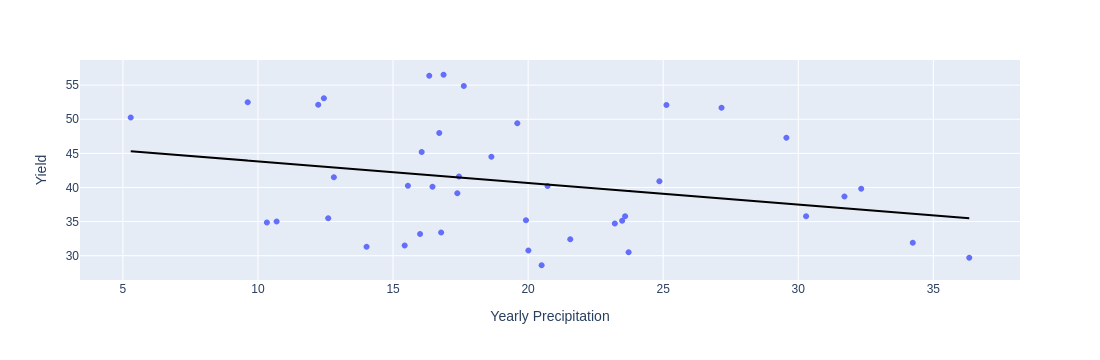

In [157]:
lm = mk_linmod(
    model_df,
    x_cols = ['Yearly Precipitation'],
    y_col=cstat
)

This time the R squared score of 0.7 is an increase compared to the statewide model, but it is still far too small to indicate a proper linear relationship.

We will again look at a time offset.

Model Statistics:
Slope: [-0.3013092]
Intercept: 46.80545969997266
R^2: 0.06516636477144
aR^2: 0.04119627156045136


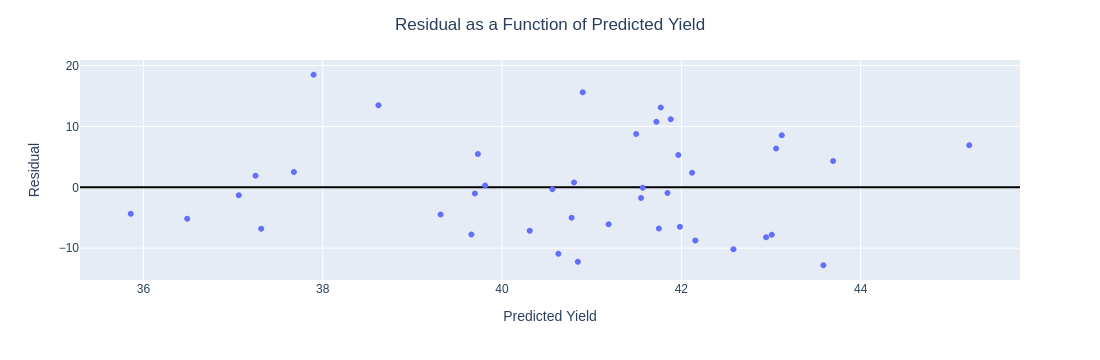

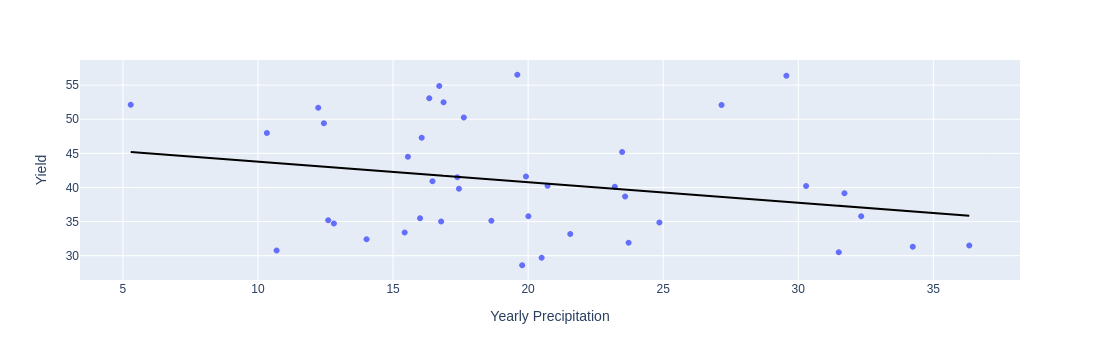

In [160]:
pcpn_off_df = fs_pcpn_df.copy()
pcpn_off_df['Year'] = pcpn_off_df['Year']+2

model_offset_df = join_ag_pcpn_temp(fs_agdata, pcpn_off_df, fs_tavg_df)

lm = mk_linmod(
    model_offset_df,
    x_cols = ['Yearly Precipitation'],
    y_col=cstat
)

Offsetting the data again did not improve the model's fit.

##### Time
Now we will look at time.

Model Statistics:
Slope: [0.63607143]
Intercept: -1231.376515679443
R^2: 0.824460617235272
aR^2: 0.8199596074207918


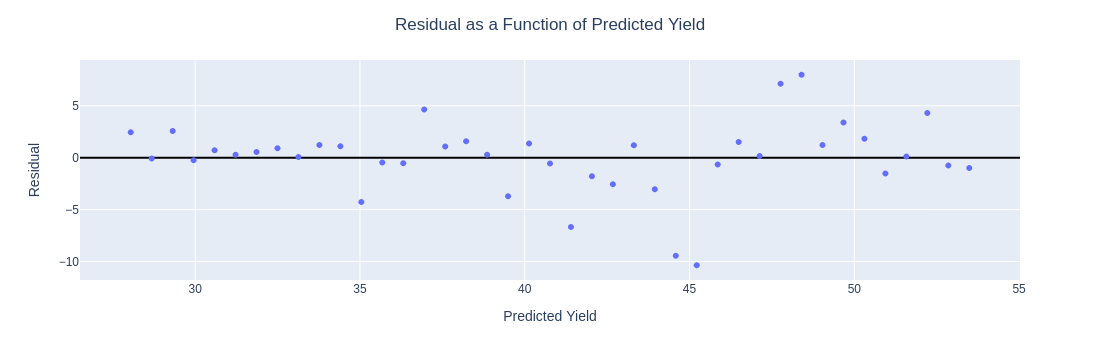

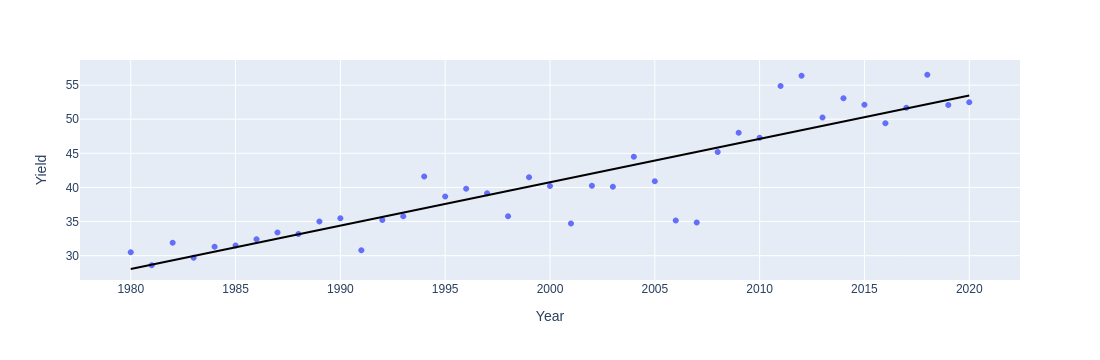

In [163]:
lm = mk_linmod(
    model_df,
    x_cols = ['Year'],
    y_col=cstat
)

The Fresno R squared score of 0.82 is less than that of the statewide model, but it is still very good.

##### Multiple Variables
We can do a last model using both temperature and year to see if it improves the adjusted R squared score.

Model Statistics:
Slope: [0.62706608 0.17431175]
Intercept: -1223.606918504406
R^2: 0.8247795311218876
aR^2: 0.8155574011809343


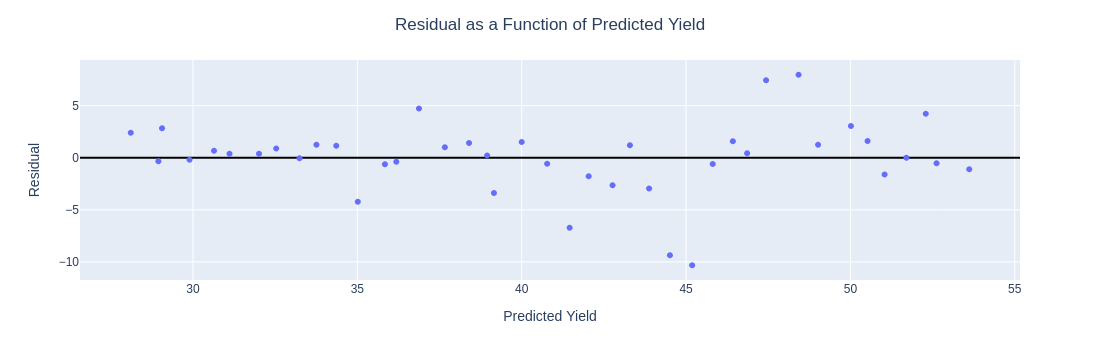

In [166]:
lm = mk_linmod(
    model_df,
    x_cols = ['Year', 'Yearly Average Temperature'],
    y_col=cstat
)

The year-only model had an adjusted R squared of 0.8200. This model has a score of 0.8156, which is actually a decrease in efficacy.

## Conclusion

The results of our analysis indicate that compared to the passage of time, the effects of temperature and precipitation on California's tomato output is almost inconsequential. Over time tomato yield has seen a distinct increase, probably as a result of improved farming practices and crop varieties that can overcome high temperatures. That said, it is unlikely that the current trend of ignoring yearly precipitation levels is maintainable. Where Fresno traditionally sourced water from natural groundwater, in recent years it has needed to continually draw supplementary water from the Sierra Nevada (see its [water quality and testing](https://www.fresno.gov/publicutilities/water-division/water-quality-and-testing/#water-testing) page). If crop production (and human population) is to increase in the future it may become necessary to turn to water sources from even farther afield or pursue farming techniques that require less active irrigation.

The major limitation of our analysis is that it only contains analysis of one crop. Perhaps if we were to observe some of the other major crops that California produces, we would see more distinct effects when it comes to temperature and precipitation. If this analysis were to continue, it would also be interesting to incorporate data on water table levels, droughts, and crop quality. Adding water table levels and drought data would give a more comprehensive view on the state of water availability. Crop quality data would help determine whether temperature and water availability may be affecting crop output in a more subtle manner that is not reflected in raw weights.